In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Set file path
file_path = '../data/Mushroom_25-05-12_0133.lvm'

# Check if file exists
if not os.path.exists(file_path):
    print(f"Error: File {file_path} does not exist")
else:
    # Read LVM file
    # LVM files are tab-separated text files without header
    data = pd.read_csv(file_path, sep='\t', header=None)
    
    # Based on file content, we need to name the columns
    # Assuming first column is timestamp, others are sensor data
    columns = ['Timestamp'] + [f'Sensor_{i}' for i in range(1, data.shape[1])]
    data.columns = columns
    
    # 删除最后一列
    data = data.iloc[:, :-1]


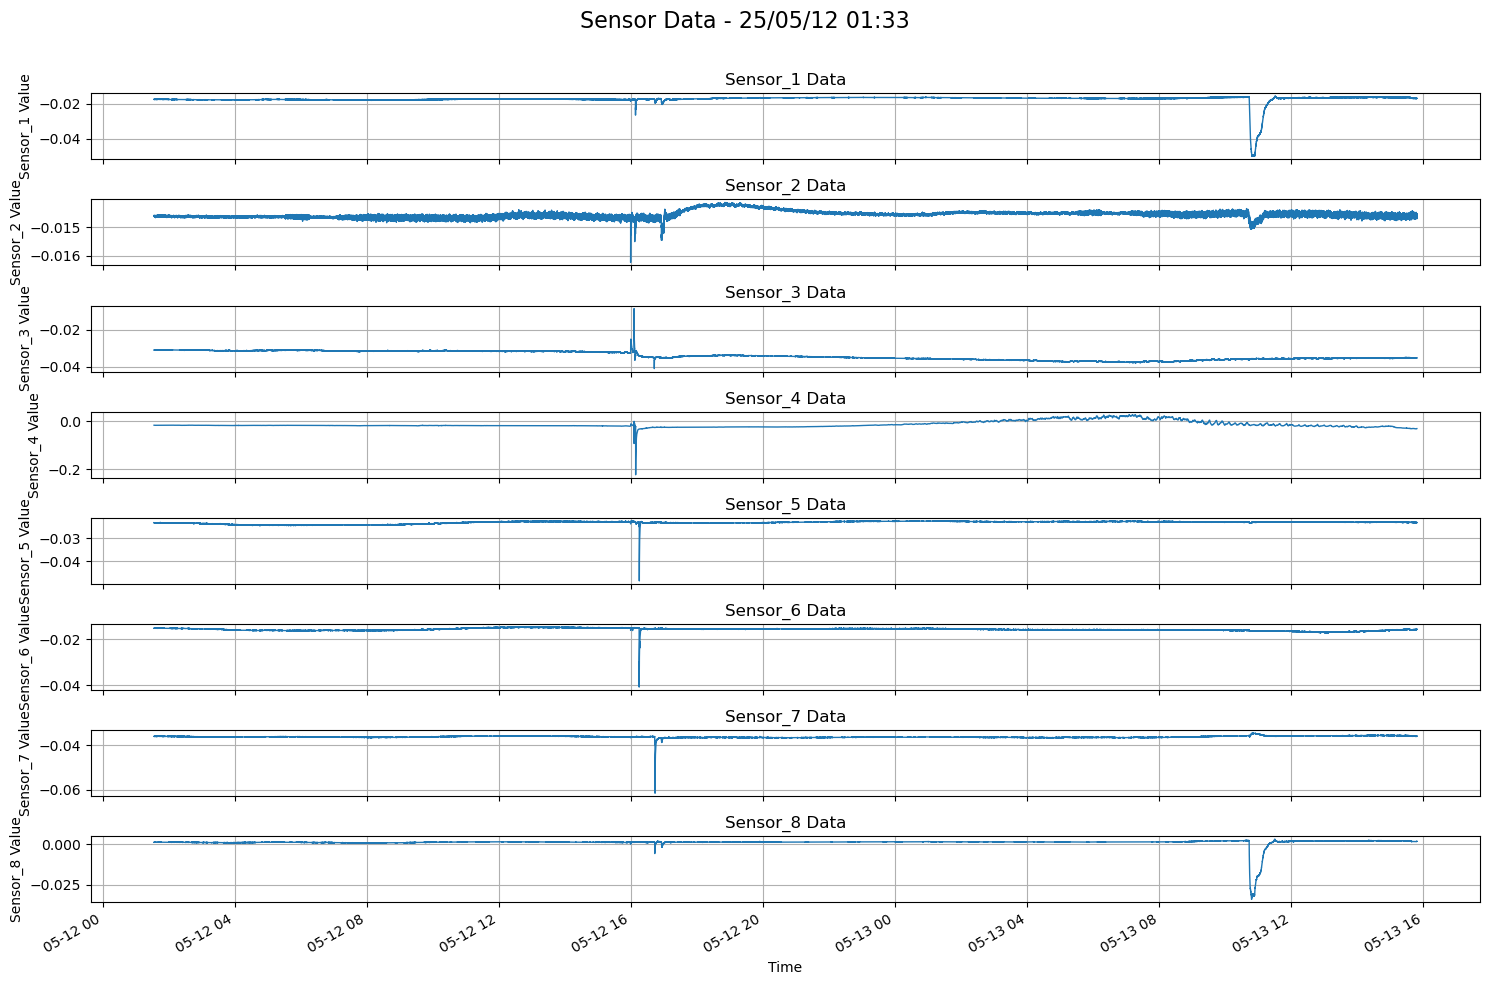

Sensor Statistics:

Sensor_1:
count    322395.000000
mean         -0.017440
std           0.002756
min          -0.050075
25%          -0.017630
50%          -0.017054
75%          -0.016633
max          -0.015825
Name: Sensor_1, dtype: float64

Sensor_2:
count    322395.000000
mean         -0.014554
std           0.000121
min          -0.016226
25%          -0.014631
50%          -0.014562
75%          -0.014497
max          -0.014126
Name: Sensor_2, dtype: float64

Sensor_3:
count    322395.000000
mean         -0.033932
std           0.002201
min          -0.040881
25%          -0.035627
50%          -0.034555
75%          -0.031479
max          -0.008600
Name: Sensor_3, dtype: float64

Sensor_4:
count    322395.000000
mean         -0.013104
std           0.012582
min          -0.223211
25%          -0.019325
50%          -0.017206
75%          -0.011415
max           0.027642
Name: Sensor_4, dtype: float64

Sensor_5:
count    322395.000000
mean         -0.023166
std           0.0005

In [3]:
# Extract date and time information from the filename
file_name = os.path.basename(file_path)  # Get the filename
date_time_str = file_name.split('_')[1:3]  # Extract date and time parts
date_str = date_time_str[0].replace('-', '/')  # Format date
time_str = date_time_str[1].replace('.lvm', '')  # Format time
# Parse time string, first two digits are hours, last two are minutes
hour = time_str[:2]
minute = time_str[2:]
formatted_time = f"{hour}:{minute}"

# Use actual timestamps and convert to specific times
actual_time = data['Timestamp']
# Calculate seconds relative to start time
start_time = actual_time.iloc[0]
relative_seconds = actual_time - start_time

# Create specific time labels
from datetime import datetime, timedelta
# Assume data recording started at the date and time specified in the filename
base_time = datetime(2025, 5, 12, int(hour), int(minute))  # Date and time parsed from filename
time_labels = [base_time + timedelta(seconds=s) for s in relative_seconds]

# Determine the number of sensors in the dataset
num_sensors = len([col for col in data.columns if 'Sensor_' in col])

# Create a figure with subplots for all sensors
plt.figure(figsize=(15, 10))

# Plot data for all sensors
for i in range(1, num_sensors + 1):
    sensor_name = f'Sensor_{i}'
    plt.subplot(num_sensors, 1, i)
    plt.plot(time_labels, data[sensor_name], linewidth=1)
    plt.title(f'{sensor_name} Data')
    plt.ylabel(f'{sensor_name} Value')
    plt.grid(True)
    
    # Only add x-label for the bottom subplot
    if i == num_sensors:
        plt.xlabel('Time')
    
    plt.gcf().autofmt_xdate()  # Automatically format x-axis date labels

# Add a main title for the entire figure
plt.suptitle(f'Sensor Data - {date_str} {formatted_time}', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Make room for the suptitle

# Display the figure
plt.show()

# Print basic statistics for all sensors
print("Sensor Statistics:")
for i in range(1, num_sensors+1):
    sensor_name = f'Sensor_{i}'
    print(f"\n{sensor_name}:\n{data[sensor_name].describe()}")


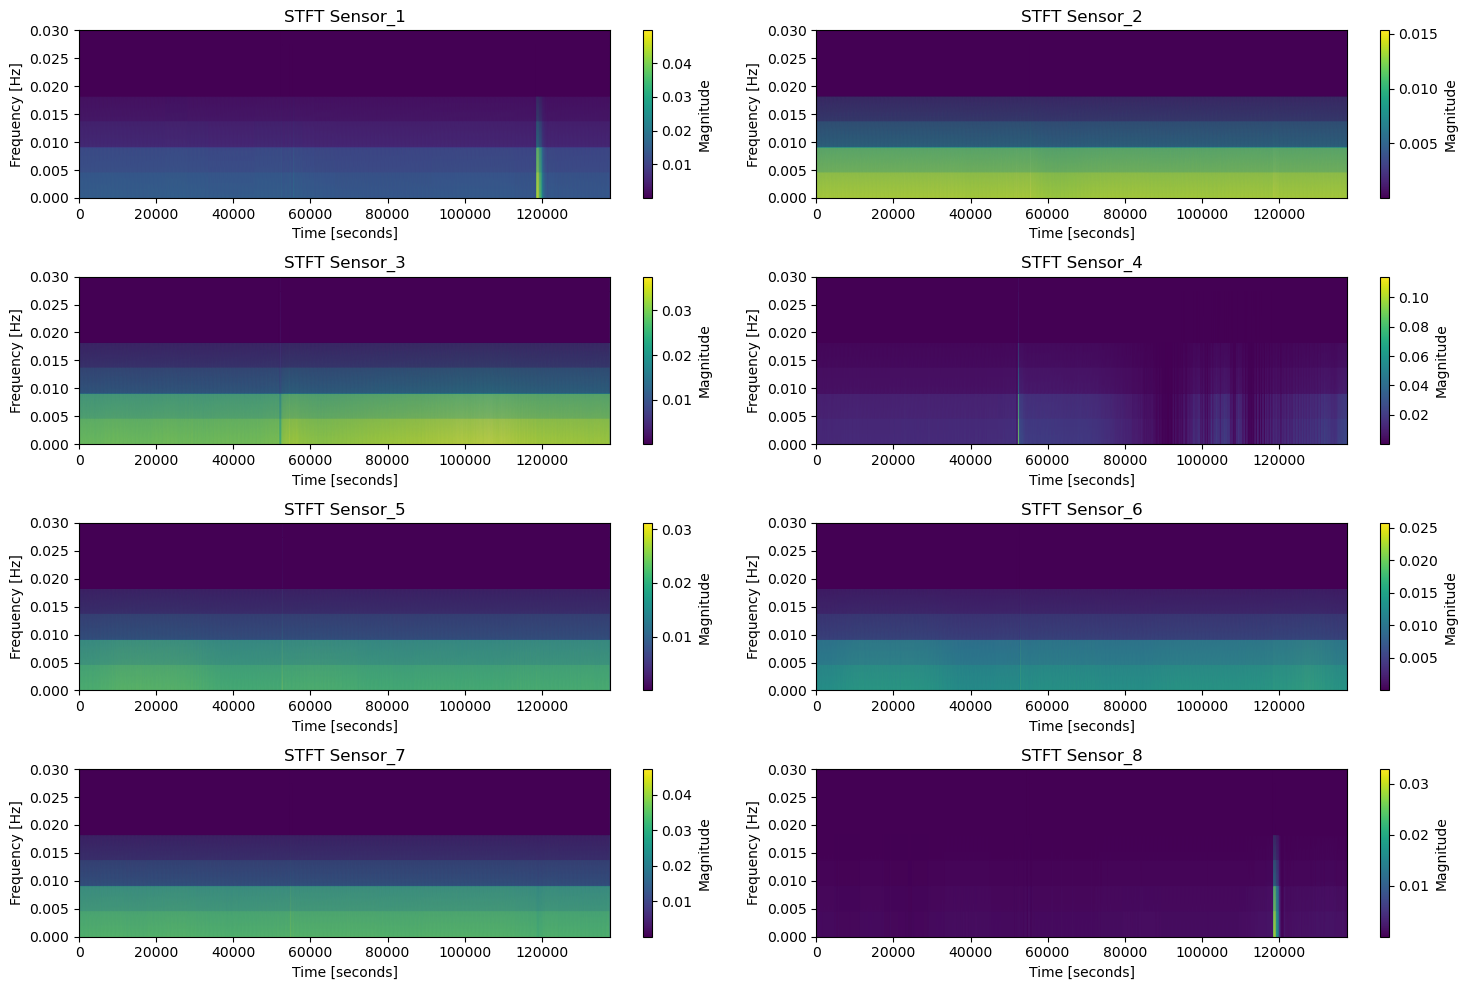

STFT analysis completed
Sampling rate: 2.34 Hz
Frequency resolution: 0.0091 Hz
Time resolution: 54.6806 seconds


In [4]:
# Perform Short-Time Fourier Transform (STFT) analysis
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure for STFT analysis
plt.figure(figsize=(15, 10))

# Perform STFT on all sensor data
for i in range(1, 9):  # Assuming 8 sensors
    sensor_name = f'Sensor_{i}'
    
    # Get sensor data
    sensor_data = data[sensor_name].values
    
    # Calculate sampling rate (based on timestamp differences)
    sampling_rate = 1.0 / np.mean(np.diff(data['Timestamp']))
    
    # Perform STFT
    f, t, Zxx = signal.stft(sensor_data, fs=sampling_rate, nperseg=256)
    
    # Plot STFT results
    plt.subplot(4, 2, i)
    
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    
    plt.title(f'STFT {sensor_name}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [seconds]')
    plt.colorbar(label='Magnitude')
    plt.ylim(0, 0.03)  # Limit y-axis to 0.03Hz

plt.tight_layout()
plt.show()

# Print basic information about the STFT analysis
print(f"STFT analysis completed")
print(f"Sampling rate: {sampling_rate:.2f} Hz")
print(f"Frequency resolution: {f[1]-f[0]:.4f} Hz")
print(f"Time resolution: {t[1]-t[0]:.4f} seconds")


In [5]:
# Calculate the recording end time based on the timestamp
import datetime
# Extract start time from the filename 
filename = file_path.split('/')[-1]
date_part = filename.split('_')[1]  
time_part = filename.split('_')[2]  

# Handle potential file extension in time_part
if '.' in time_part:
    time_part = time_part.split('.')[0]  # Remove file extension if present

year = 2000 + int(date_part.split('-')[0])  # '25' -> 2025
month = int(date_part.split('-')[1])  # '05' -> 5
day = int(date_part.split('-')[2])  # '08' -> 8
hour = int(time_part[:2])  # '03' -> 3
minute = int(time_part[2:])  # '26' -> 26

start_time = datetime.datetime(year, month, day, hour, minute)

# Get the first and last timestamp
first_timestamp = data['Timestamp'].iloc[0]
last_timestamp = data['Timestamp'].iloc[-1]

# Calculate the duration in seconds
duration_seconds = last_timestamp - first_timestamp

# Calculate the end time
end_time = start_time + datetime.timedelta(seconds=duration_seconds)

# Format and print the results
print(f"Recording start time: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Recording end time: {end_time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Total recording duration: {duration_seconds:.2f} seconds ({duration_seconds/60:.2f} minutes)")


Recording start time: 2025-05-12 01:33:00
Recording end time: 2025-05-13 15:48:24
Total recording duration: 137724.28 seconds (2295.40 minutes)


In [6]:
# Parse the event time string
event_time_str = "2025-05-12T01:33:00.000Z"
# Time window for analysis
window_minutes = 2295.4

In [7]:
# Function to find the closest timestamp in the data to a given event time
import pytz
import datetime

event_time = datetime.datetime.strptime(event_time_str, "%Y-%m-%dT%H:%M:%S.%fZ")
event_time = event_time.replace(tzinfo=pytz.UTC)  # Make it timezone-aware

# Make start_time timezone-aware as well
start_time = start_time.replace(tzinfo=pytz.UTC)

# Calculate seconds elapsed since recording start
elapsed_seconds = (event_time - start_time).total_seconds()

print(f"Event time: {event_time_str}")
print(f"Recording start time: {start_time.strftime('%Y-%m-%d %H:%M:%S %Z')}")
print(f"Seconds elapsed since recording start: {elapsed_seconds:.2f} seconds")

# Get the first timestamp from the data
first_timestamp = data['Timestamp'].iloc[0]

# Calculate the target timestamp by adding elapsed seconds to the first timestamp
target_timestamp = first_timestamp + elapsed_seconds

# Find the closest timestamp in the data
closest_idx = (data['Timestamp'] - target_timestamp).abs().idxmin()
closest_timestamp = data['Timestamp'].iloc[closest_idx]
closest_time_diff = abs(closest_timestamp - target_timestamp)

print(f"First data timestamp: {first_timestamp:.2f} seconds")
print(f"Target timestamp: {target_timestamp:.2f} seconds")
print(f"Closest data timestamp: {closest_timestamp:.2f} seconds")
print(f"Difference from target: {closest_time_diff:.2f} seconds")

# Extract the data at the closest timestamp
event_data = data.iloc[closest_idx]
print("\nSensor readings at event time:")
for column in data.columns:
    if column != 'Timestamp':
        print(f"{column}: {event_data[column]}")


Event time: 2025-05-12T01:33:00.000Z
Recording start time: 2025-05-12 01:33:00 UTC
Seconds elapsed since recording start: 0.00 seconds
First data timestamp: 459211.41 seconds
Target timestamp: 459211.41 seconds
Closest data timestamp: 459211.41 seconds
Difference from target: 0.00 seconds

Sensor readings at event time:
Sensor_1: -0.017567
Sensor_2: -0.014595
Sensor_3: -0.030825
Sensor_4: -0.016012
Sensor_5: -0.023257
Sensor_6: -0.015131
Sensor_7: -0.035947
Sensor_8: 0.001177


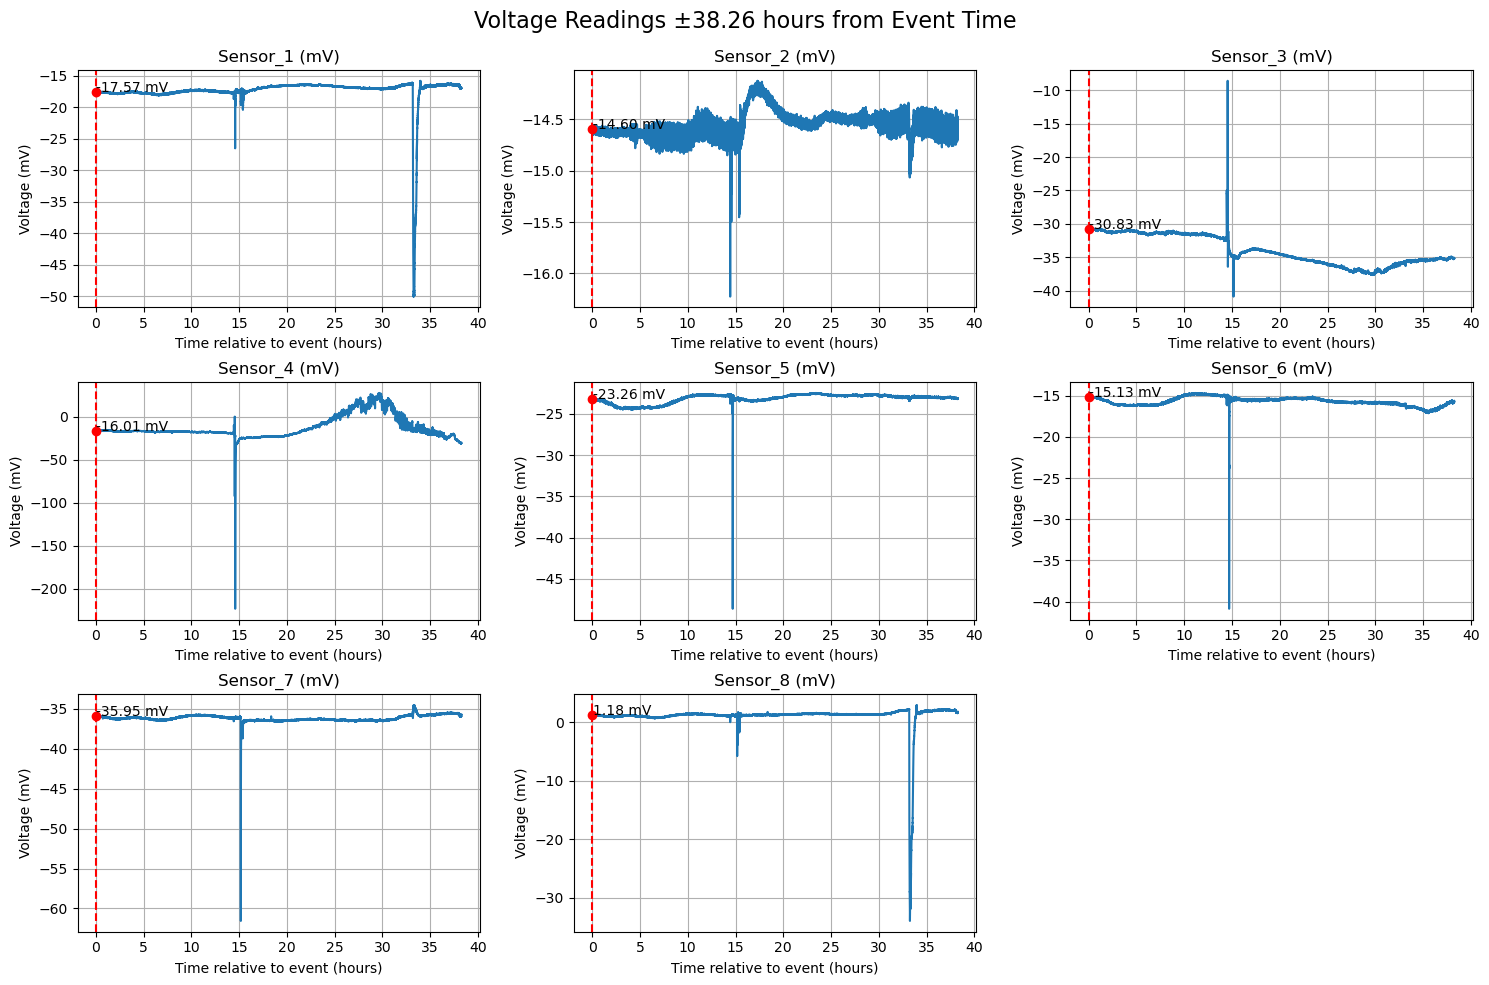

In [8]:
# Plot voltage data for 10 minutes before and after the event time
import matplotlib.pyplot as plt
import numpy as np

# Define the time window (given minutes before and after the event)
window_seconds = window_minutes * 60  # Convert minutes to seconds
event_idx = closest_idx
start_idx = max(0, event_idx - int(window_seconds * data['Timestamp'].diff().median() ** -1))
end_idx = min(len(data) - 1, event_idx + int(window_seconds * data['Timestamp'].diff().median() ** -1))

# Extract the data for the time window
# window_data = data.iloc[start_idx:end_idx+1]  # uncommnet time window
window_data = data.iloc[0:end_idx+1]  # fro overview

# Calculate time relative to the event (in seconds)
relative_time = window_data['Timestamp'] - closest_timestamp

# Convert seconds to hours
relative_time_hours = relative_time / 3600  # Convert to hours

# Create a figure with subplots for each voltage channel
plt.figure(figsize=(15, 10))
voltage_columns = [col for col in data.columns if col != 'Timestamp']

for i, column in enumerate(voltage_columns):
    plt.subplot(3, 3, i+1)
    
    # Convert voltage to millivolts
    voltage_mv = window_data[column] * 1000  # Convert to mV
    
    plt.plot(relative_time_hours, voltage_mv)
    plt.axvline(x=0, color='r', linestyle='--', label='Event time')
    plt.title(f'{column} (mV)')
    plt.xlabel('Time relative to event (hours)')
    plt.ylabel('Voltage (mV)')
    plt.grid(True)
    
    # Add a red dot at the event time point
    event_value_mv = event_data[column] * 1000  # Convert to mV
    plt.plot(0, event_value_mv, 'ro', markersize=6)  # Red dot at event time
    plt.text(0.05, event_value_mv, f'{event_value_mv:.2f} mV')  # Text label without arrow

plt.tight_layout()
plt.suptitle(f'Voltage Readings ±{window_minutes/60:.2f} hours from Event Time', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


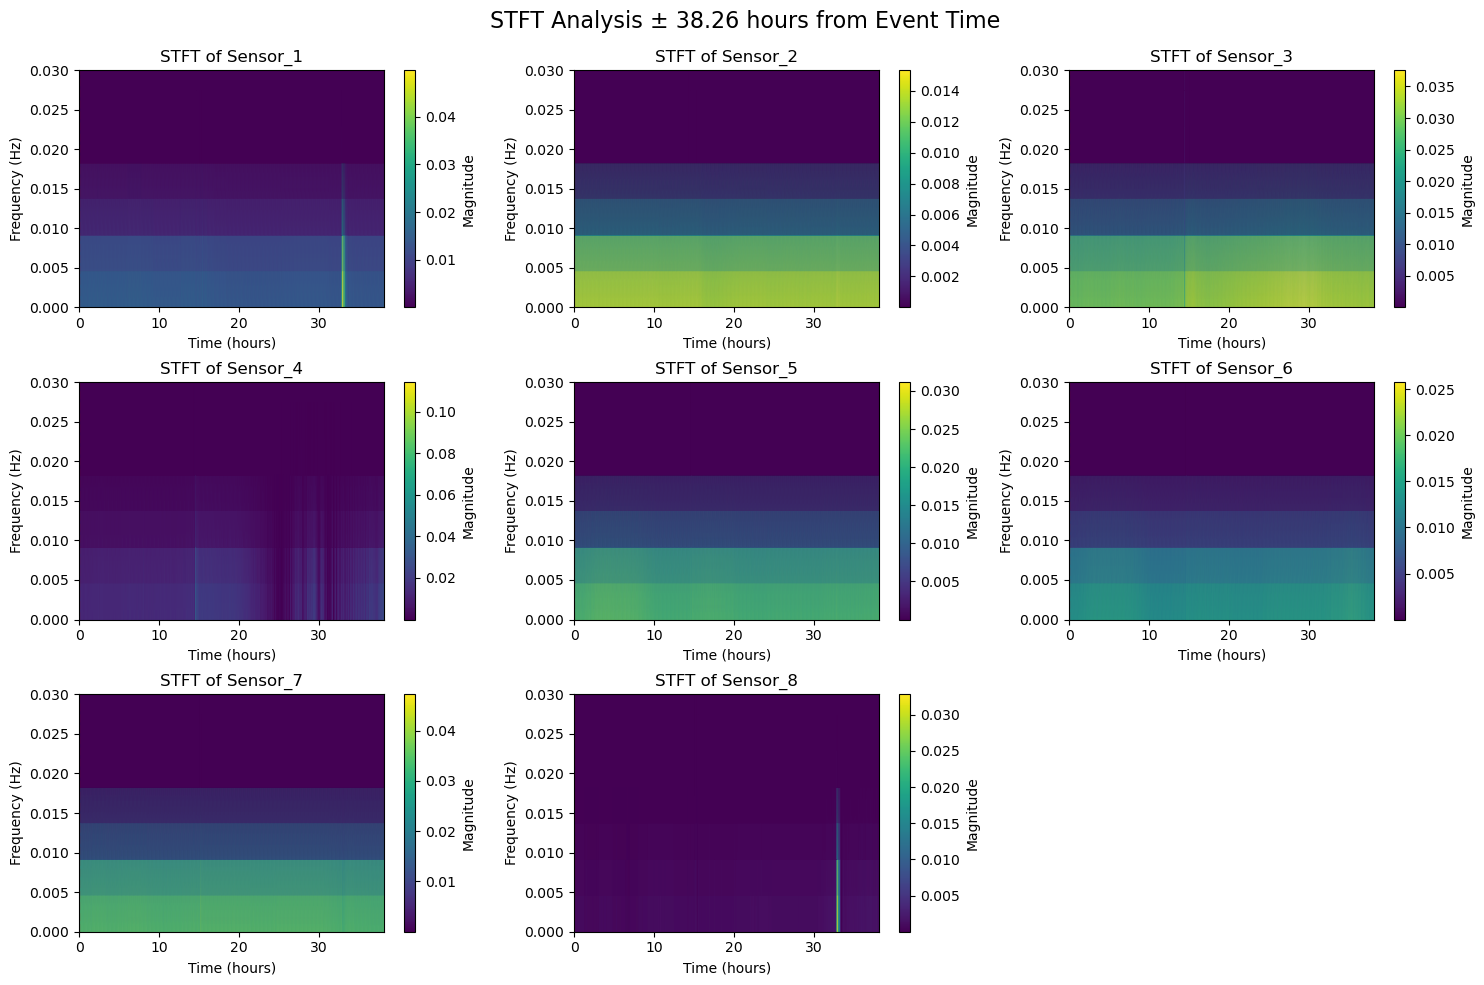

In [9]:
# Perform Short-Time Fourier Transform (STFT) analysis for each voltage channel
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Create a figure with subplots for STFT of each voltage channel
plt.figure(figsize=(15, 10))
voltage_columns = [col for col in data.columns if col != 'Timestamp']

# Calculate sampling frequency
sampling_freq = 1.0 / data['Timestamp'].diff().median()

for i, column in enumerate(voltage_columns):
    plt.subplot(3, 3, i+1)
    
    # Get voltage data for this channel
    voltage_data = window_data[column].values
    
    # Perform STFT
    f, t, Zxx = signal.stft(voltage_data, fs=sampling_freq, nperseg=256)
    
    # Convert time from seconds to hours
    t_hours = t / 3600
    
    # Plot the STFT magnitude (in dB)
    plt.pcolormesh(t_hours, f, np.abs(Zxx), shading='gouraud')
    
    # Mark the event time
    event_idx = np.argmin(np.abs(t_hours))
    plt.axvline(x=t_hours[event_idx], color='r', linestyle='--', label='event time')
    
    plt.title(f'STFT of {column}')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (hours)')
    plt.colorbar(label='Magnitude')
    plt.ylim(0, 0.03)
    
plt.tight_layout()
plt.suptitle(f'STFT Analysis ± {window_minutes/60:.2f} hours from Event Time', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


Created directory: significant_changes_csv_overview

=== Analysis for Sensor_1 ===
Analyzing frequency: 0.0091 Hz (closest to 0.005 Hz)
Average magnitude before event: 0.0088
Average magnitude after event: 0.0087
Change: -0.0001 (-1.34%)


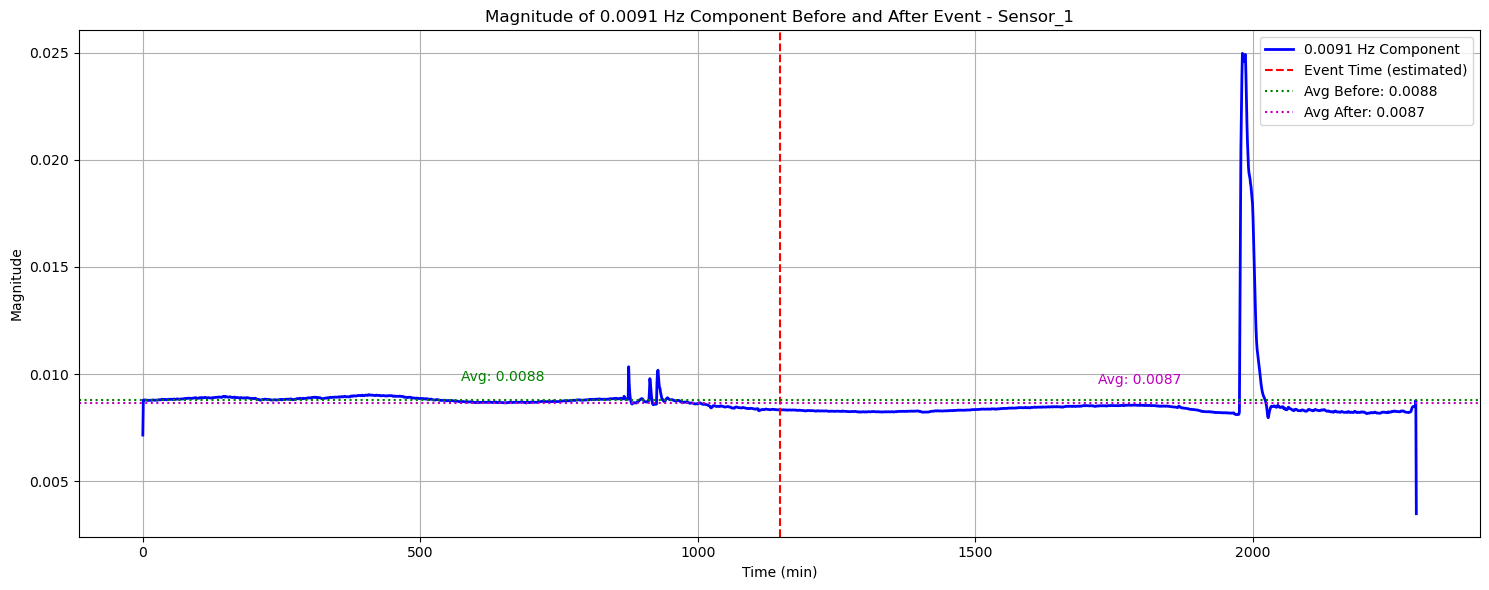


Energy Analysis:
Total energy before event: 0.0971
Total energy after event: 0.0992
Average energy before event: 0.0001
Average energy after event: 0.0001
Energy change: 0.0000 (2.19%)


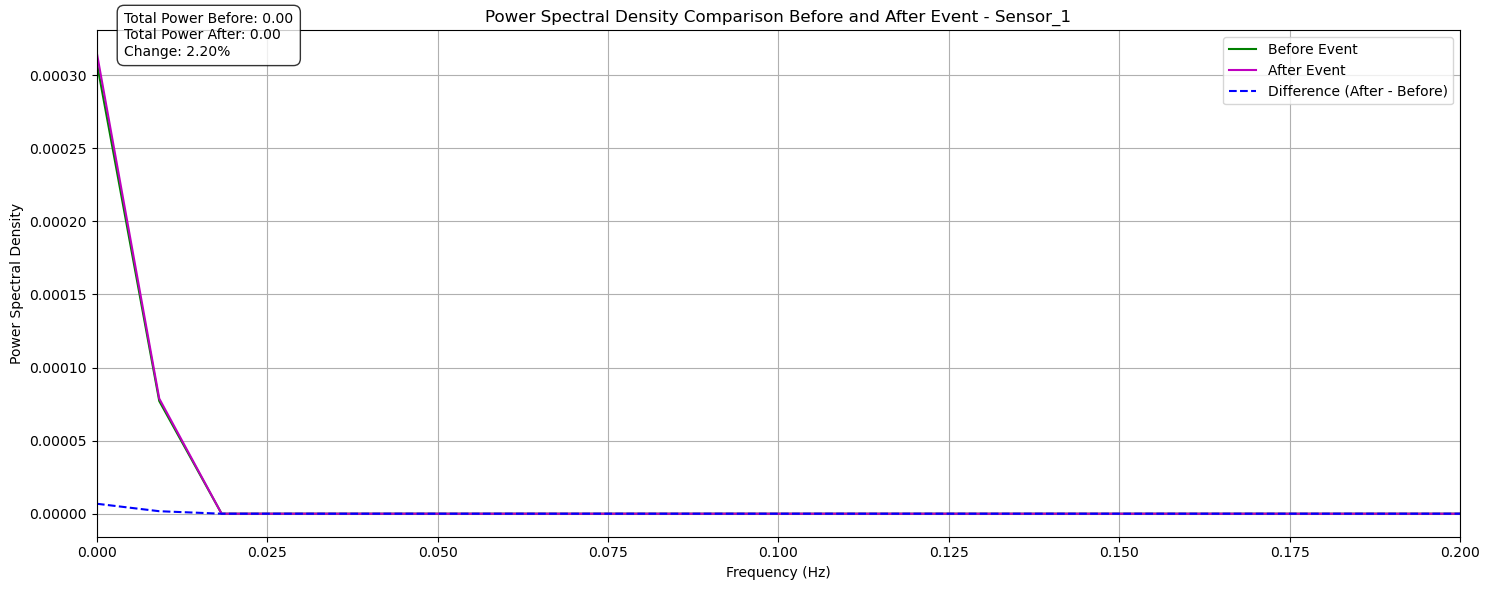


Power Spectral Density Analysis:
Total power before event: 0.0004
Total power after event: 0.0004
Absolute power change: 0.0000
Relative power change: 2.20%
Saved significant changes data to: significant_changes_csv_overview\Sensor_1_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  3.081348e-04  3.149319e-04     6.797109e-06        2.205888
1     0.009148  7.706701e-05  7.876492e-05     1.697909e-06        2.203157
117   1.070258  6.925794e-12  5.070014e-12    -1.855781e-12       -1.735578
123   1.125143  6.922597e-12  5.042508e-12    -1.880089e-12       -1.758364
118   1.079406  6.992813e-12  5.036175e-12    -1.956639e-12       -1.828757

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
2    0.018295  1.181567e-08  6.209725e-09    -5.605945e-09      -47.046830
4    0.036590  1.886186e-09  9.840136e-

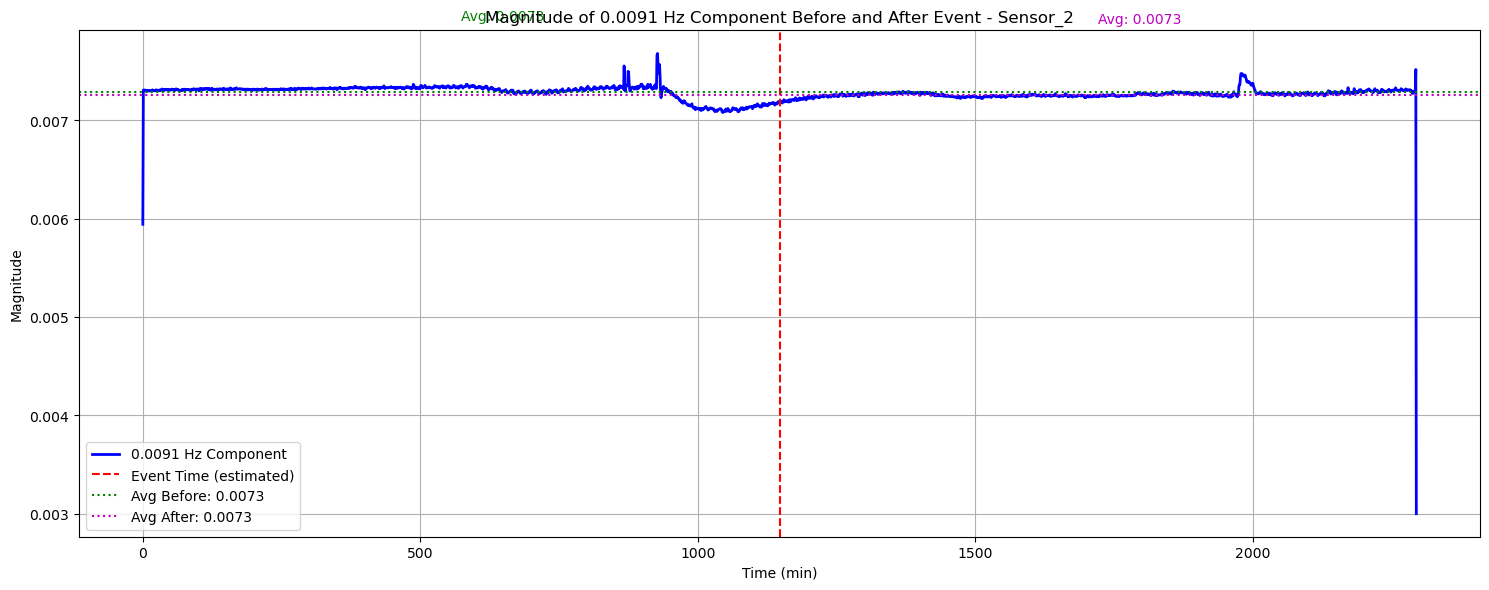


Energy Analysis:
Total energy before event: 0.0669
Total energy after event: 0.0664
Average energy before event: 0.0001
Average energy after event: 0.0001
Energy change: -0.0000 (-0.76%)


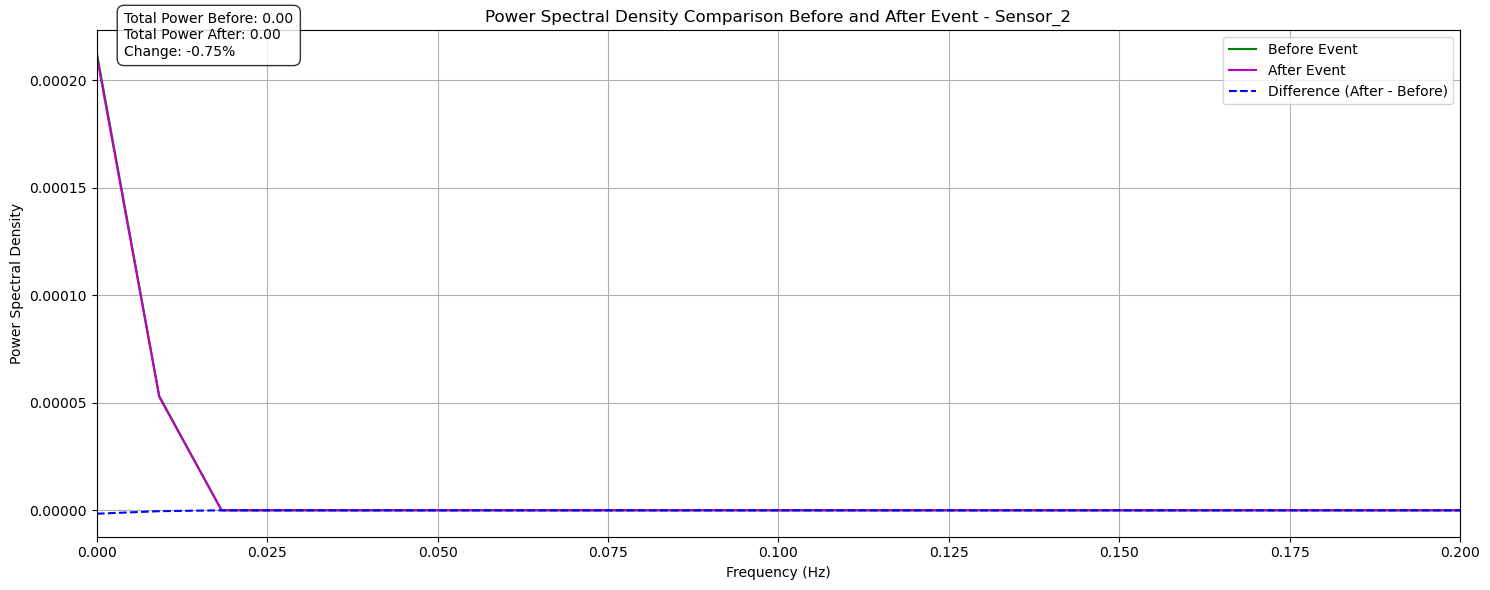


Power Spectral Density Analysis:
Total power before event: 0.0003
Total power after event: 0.0003
Absolute power change: -0.0000
Relative power change: -0.75%
Saved significant changes data to: significant_changes_csv_overview\Sensor_2_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  2.124666e-04  2.108889e-04    -1.577656e-06       -0.742543
1     0.009148  5.313457e-05  5.273171e-05    -4.028562e-07       -0.758180
128   1.170881  7.353408e-12  6.367103e-12    -9.863053e-13       -0.918746
110   1.006226  7.544092e-12  6.536338e-12    -1.007755e-12       -0.937062
86    0.786685  8.218590e-12  7.163144e-12    -1.055446e-12       -0.975291

Top 5 frequencies with largest power decrease:
   Frequency        Before         After  Absolute_Change  Percent_Change
2   0.018295  7.640200e-09  4.021522e-09    -3.618678e-09      -46.751737
4   0.036590  1.227996e-09  7.309230e-1

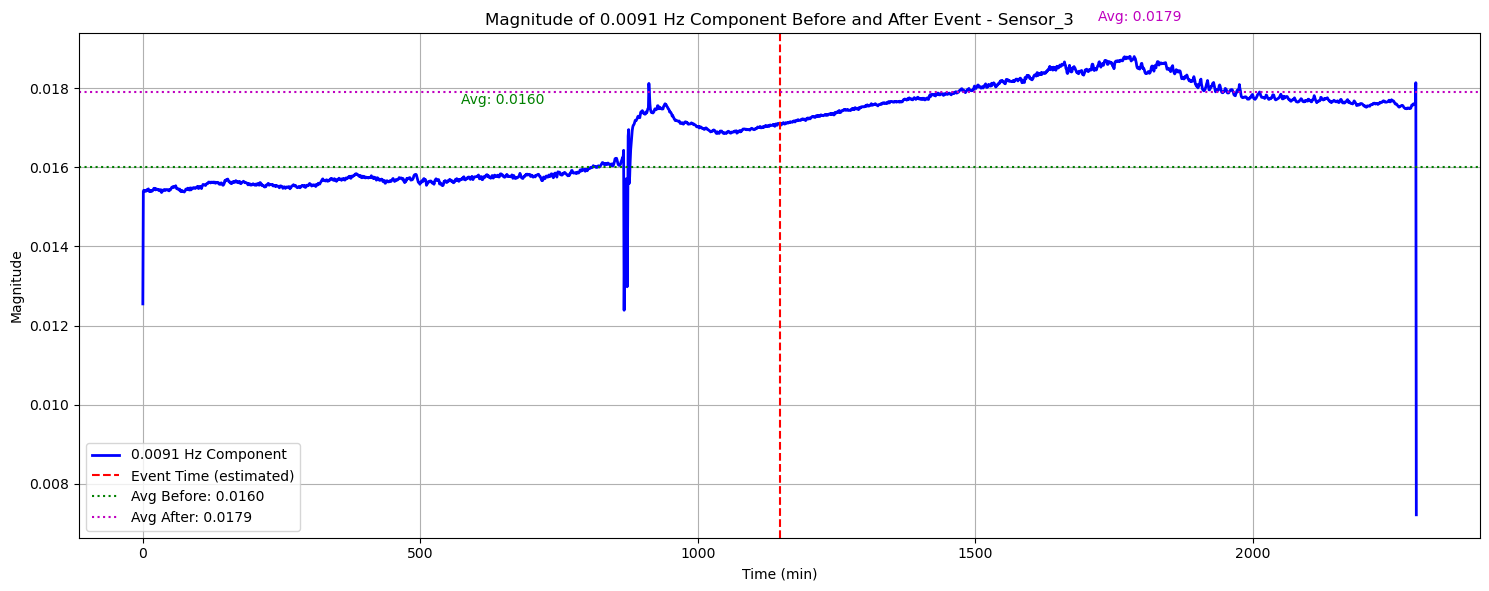


Energy Analysis:
Total energy before event: 0.3236
Total energy after event: 0.4046
Average energy before event: 0.0003
Average energy after event: 0.0003
Energy change: 0.0001 (25.03%)


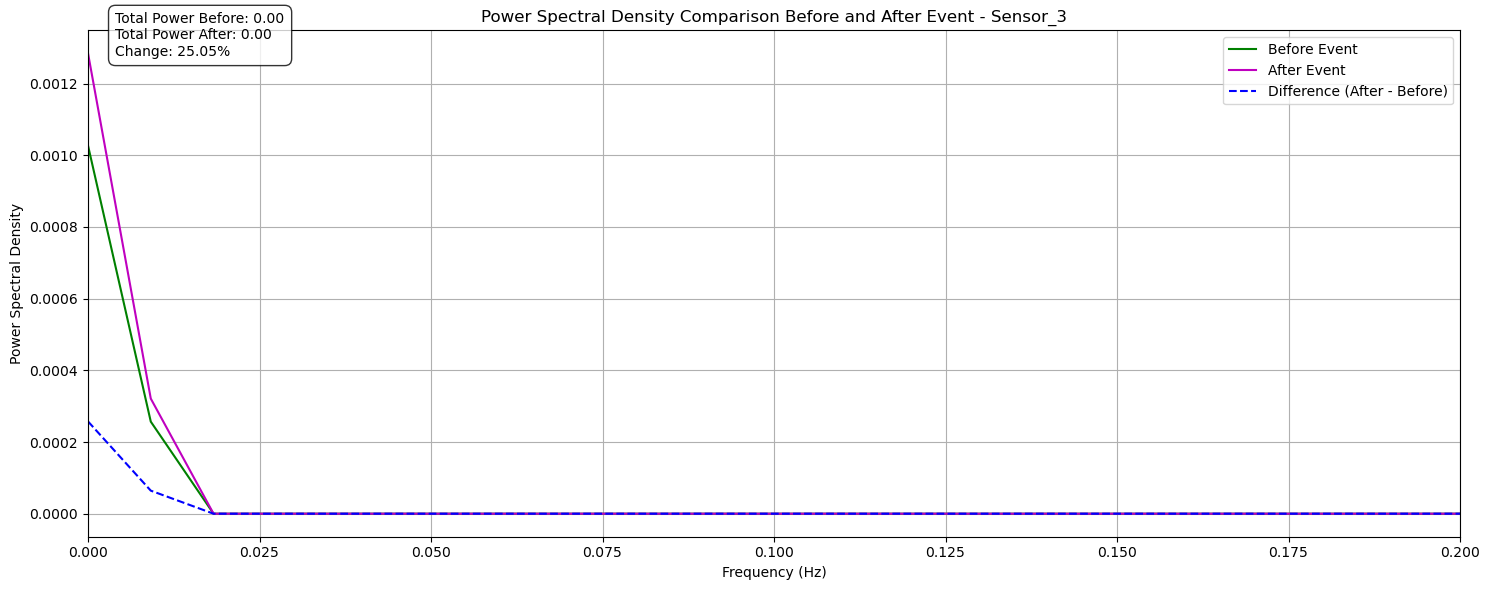


Power Spectral Density Analysis:
Total power before event: 0.0013
Total power after event: 0.0016
Absolute power change: 0.0003
Relative power change: 25.05%
Saved significant changes data to: significant_changes_csv_overview\Sensor_3_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  1.026807e-03  1.284180e-03     2.573733e-04       25.065405
1     0.009148  2.568055e-04  3.210969e-04     6.429137e-05       25.035031
126   1.152586  1.337621e-11  1.131406e-11    -2.062149e-12       -1.818855
111   1.015373  1.370775e-11  1.160229e-11    -2.105467e-12       -1.851648
127   1.161733  1.333573e-11  1.122021e-11    -2.115522e-12       -1.866598

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
8    0.073180  2.254847e-09  1.089701e-09    -1.165146e-09      -49.478633
7    0.064033  2.840564e-09  1.388154e

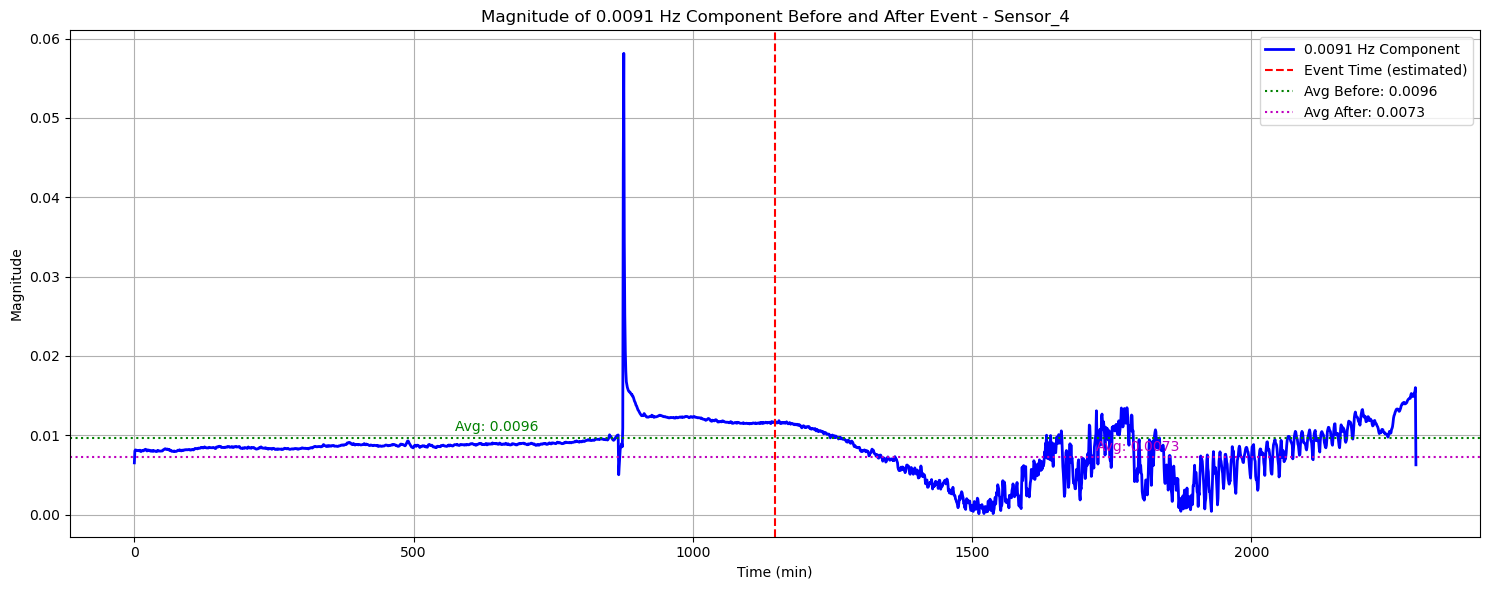


Energy Analysis:
Total energy before event: 0.1243
Total energy after event: 0.0834
Average energy before event: 0.0001
Average energy after event: 0.0001
Energy change: -0.0000 (-32.88%)


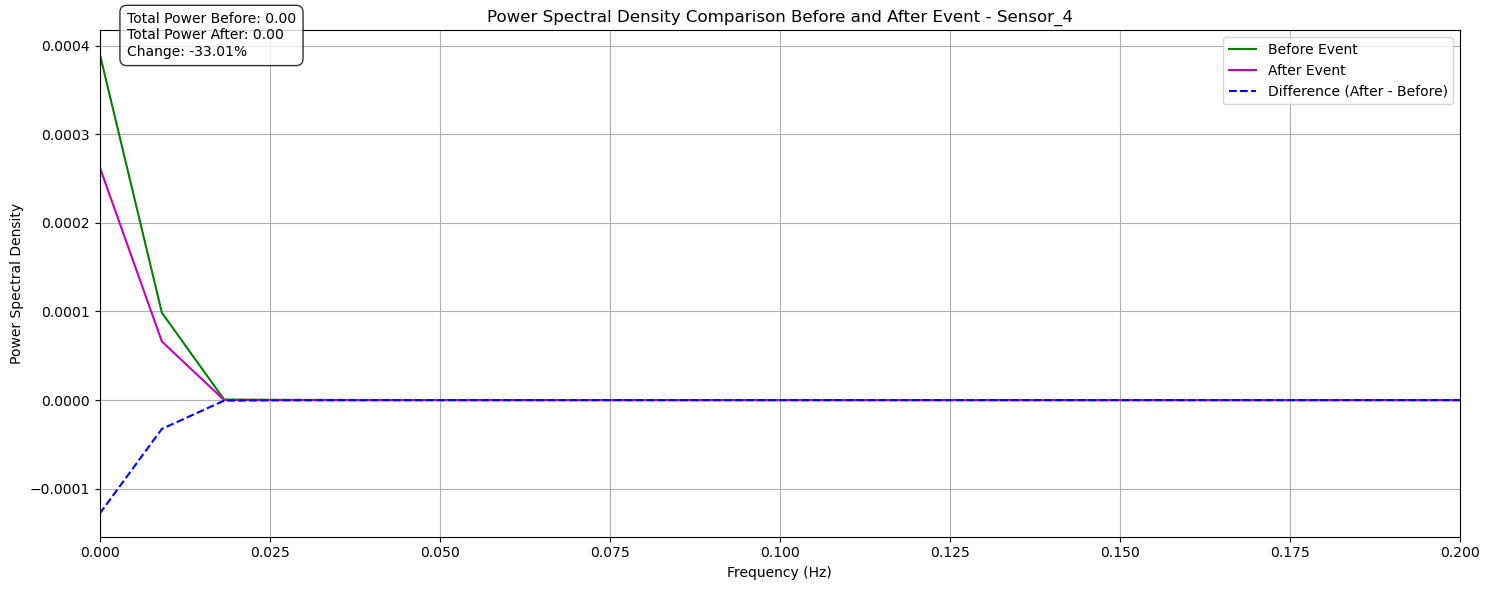


Power Spectral Density Analysis:
Total power before event: 0.0005
Total power after event: 0.0003
Absolute power change: -0.0002
Relative power change: -33.01%
Saved significant changes data to: significant_changes_csv_overview\Sensor_4_significant_changes.csv

Top 5 frequencies with largest power increase:
    Frequency        Before         After  Absolute_Change  Percent_Change
0    0.000000  3.912519e-04  2.630662e-04    -1.281857e-04      -32.762962
1    0.009148  9.862530e-05  6.614208e-05    -3.248323e-05      -32.935964
91   0.832423  4.835001e-10  1.059587e-11    -4.729042e-10      -81.046125
94   0.859865  4.868570e-10  1.042587e-11    -4.764311e-10      -81.183512
90   0.823275  4.932338e-10  1.073455e-11    -4.824993e-10      -81.333743

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
10   0.091475  2.674726e-08  5.176977e-10    -2.622956e-08      -97.699215
12   0.109770  1.966734e-08  3.635995e-10 

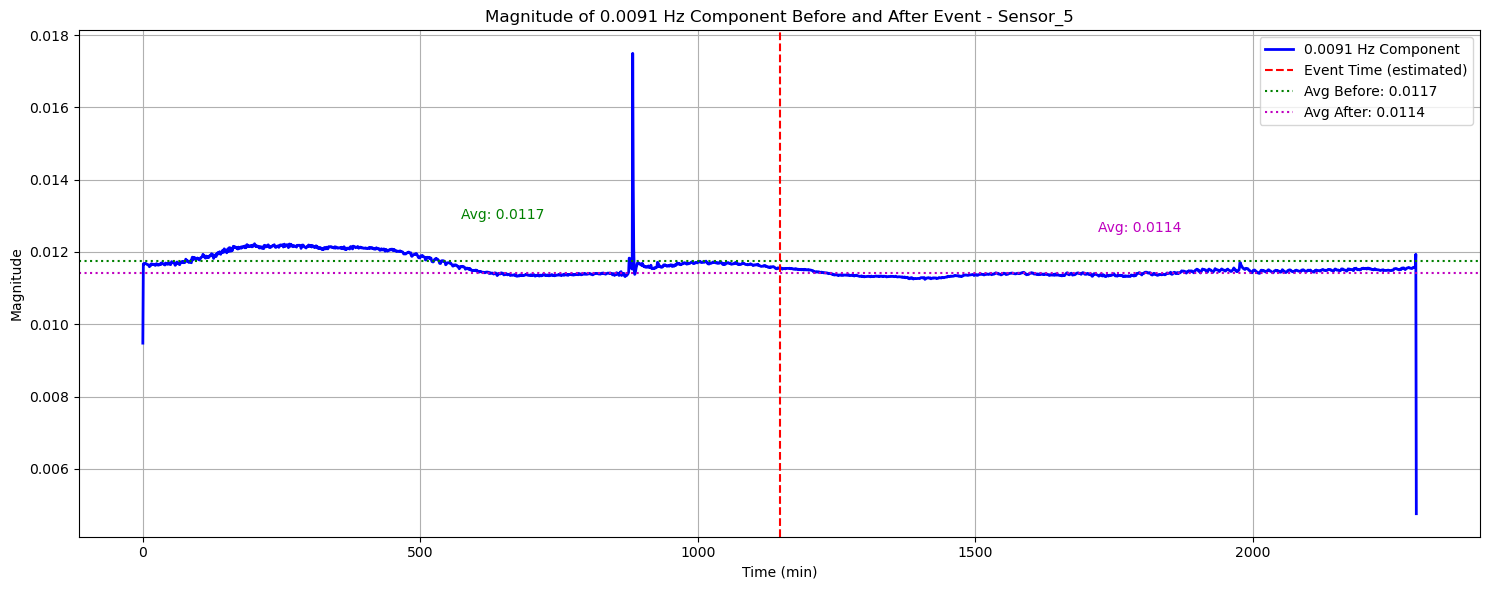


Energy Analysis:
Total energy before event: 0.1740
Total energy after event: 0.1642
Average energy before event: 0.0001
Average energy after event: 0.0001
Energy change: -0.0000 (-5.63%)


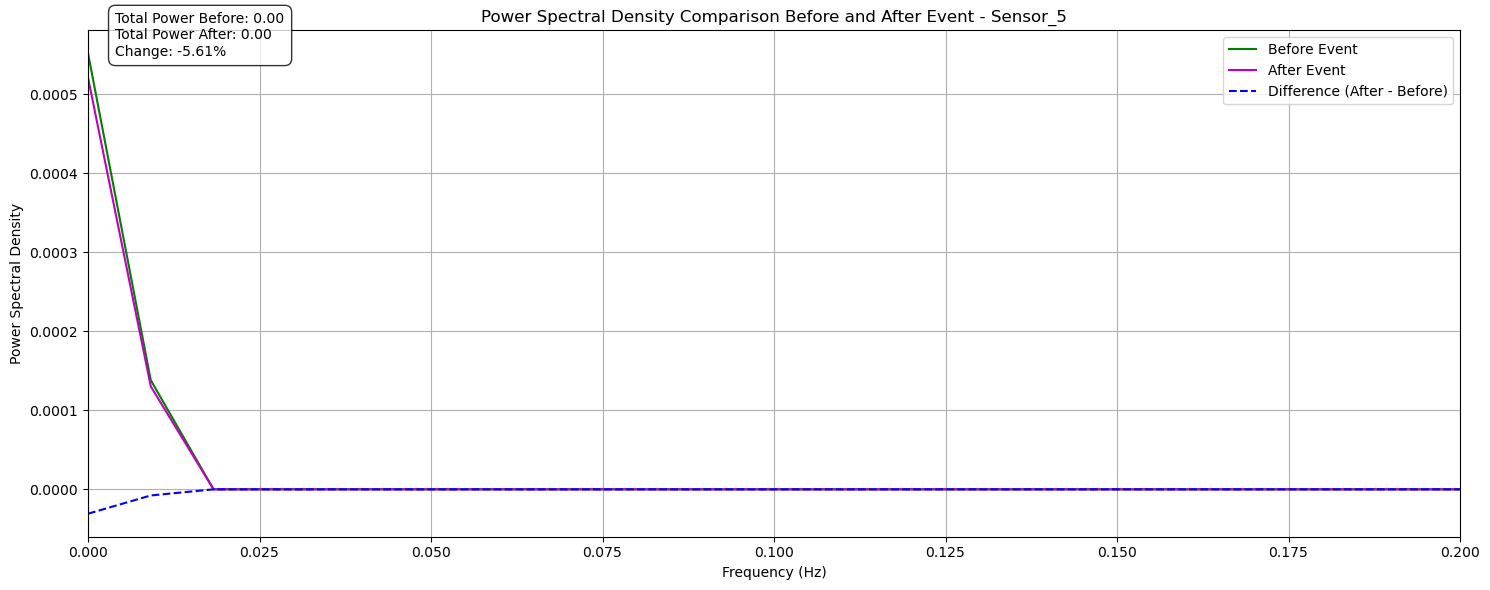


Power Spectral Density Analysis:
Total power before event: 0.0007
Total power after event: 0.0007
Absolute power change: -0.0000
Relative power change: -5.61%
Saved significant changes data to: significant_changes_csv_overview\Sensor_5_significant_changes.csv

Top 5 frequencies with largest power increase:
    Frequency        Before         After  Absolute_Change  Percent_Change
87   0.795833  9.517143e-12  6.642509e-12    -2.874634e-12       -2.624826
88   0.804980  9.343310e-12  6.439120e-12    -2.904190e-12       -2.656029
89   0.814128  9.382992e-12  6.330574e-12    -3.052419e-12       -2.790579
86   0.786685  9.784760e-12  6.645488e-12    -3.139272e-12       -2.859479
90   0.823275  9.509584e-12  6.375804e-12    -3.133780e-12       -2.861649

Top 5 frequencies with largest power decrease:
   Frequency        Before         After  Absolute_Change  Percent_Change
2   0.018295  3.300901e-08  1.008357e-08    -2.292544e-08      -69.242300
4   0.036590  6.041009e-09  1.826798e-09    -

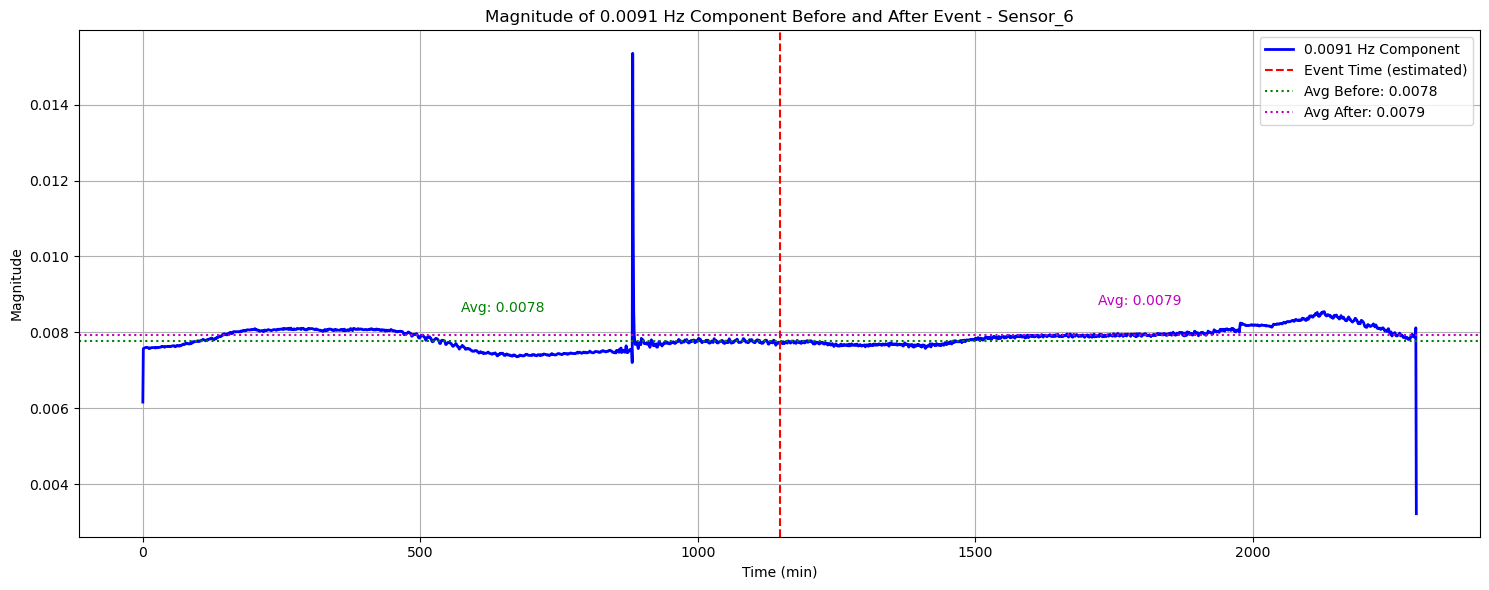


Energy Analysis:
Total energy before event: 0.0761
Total energy after event: 0.0794
Average energy before event: 0.0001
Average energy after event: 0.0001
Energy change: 0.0000 (4.38%)


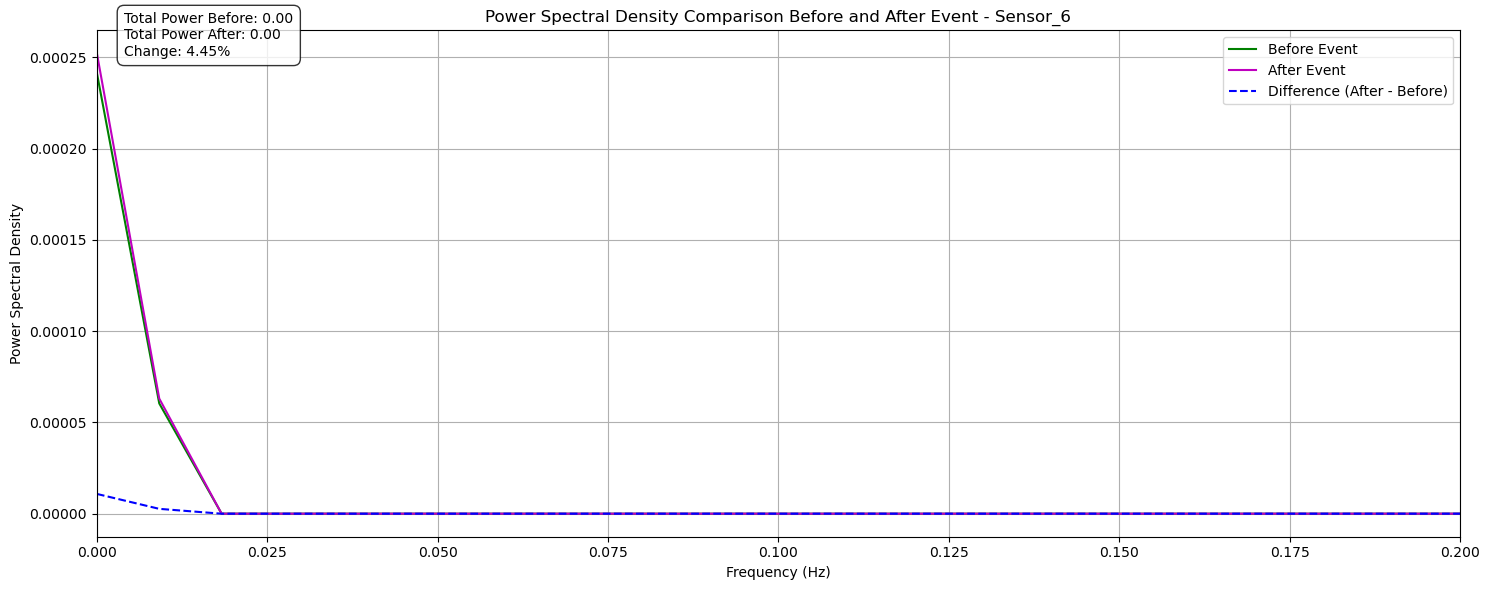


Power Spectral Density Analysis:
Total power before event: 0.0003
Total power after event: 0.0003
Absolute power change: 0.0000
Relative power change: 4.45%
Saved significant changes data to: significant_changes_csv_overview\Sensor_6_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  2.413016e-04  2.521137e-04     1.081209e-05        4.480736
1     0.009148  6.039169e-05  6.303892e-05     2.647224e-06        4.383416
106   0.969636  4.038726e-12  3.143371e-12    -8.953555e-13       -0.860598
112   1.024521  3.968444e-12  3.064689e-12    -9.037554e-13       -0.869259
113   1.033668  3.988495e-12  3.070271e-12    -9.182247e-13       -0.883006

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
2    0.018295  1.819442e-08  4.655556e-09    -1.353887e-08      -74.005430
8    0.073180  9.952047e-10  2.181529e-

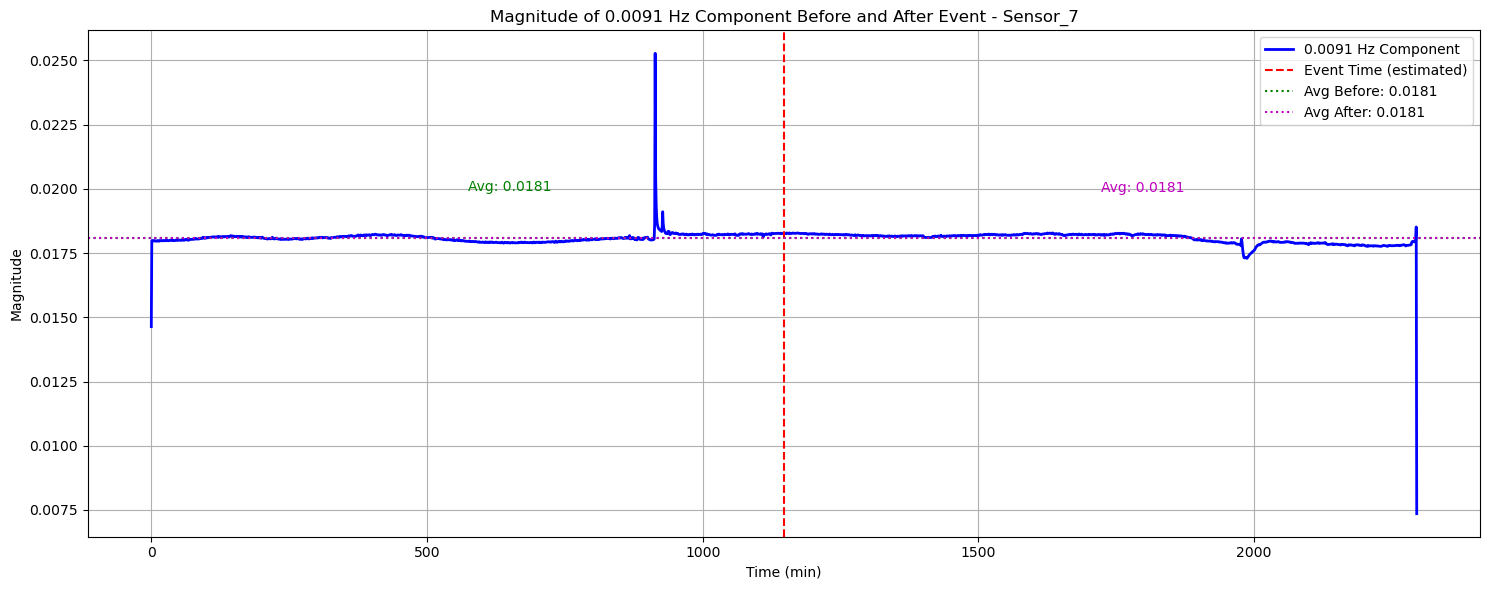


Energy Analysis:
Total energy before event: 0.4129
Total energy after event: 0.4116
Average energy before event: 0.0003
Average energy after event: 0.0003
Energy change: -0.0000 (-0.31%)


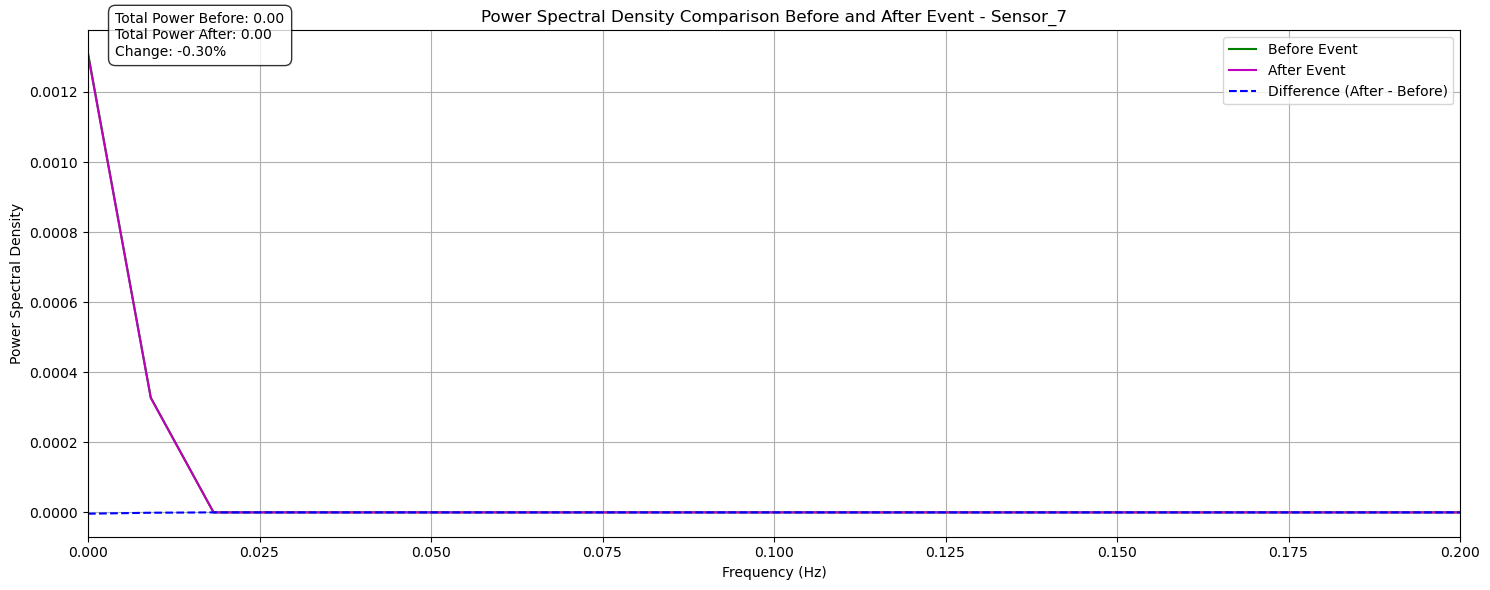


Power Spectral Density Analysis:
Total power before event: 0.0016
Total power after event: 0.0016
Absolute power change: -0.0000
Relative power change: -0.30%
Saved significant changes data to: significant_changes_csv_overview\Sensor_7_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  1.310162e-03  1.306369e-03    -3.793057e-06       -0.289511
1     0.009148  3.276777e-04  3.266486e-04    -1.029111e-06       -0.314062
128   1.170881  1.667885e-11  1.132992e-11    -5.348928e-12       -4.584316
125   1.143438  1.667724e-11  1.126724e-11    -5.410002e-12       -4.636724
105   0.960488  1.763610e-11  1.218164e-11    -5.454465e-12       -4.636727

Top 5 frequencies with largest power decrease:
   Frequency        Before         After  Absolute_Change  Percent_Change
2   0.018295  5.173608e-08  2.405788e-08    -2.767820e-08      -53.395629
4   0.036590  8.797801e-09  4.352224e-0

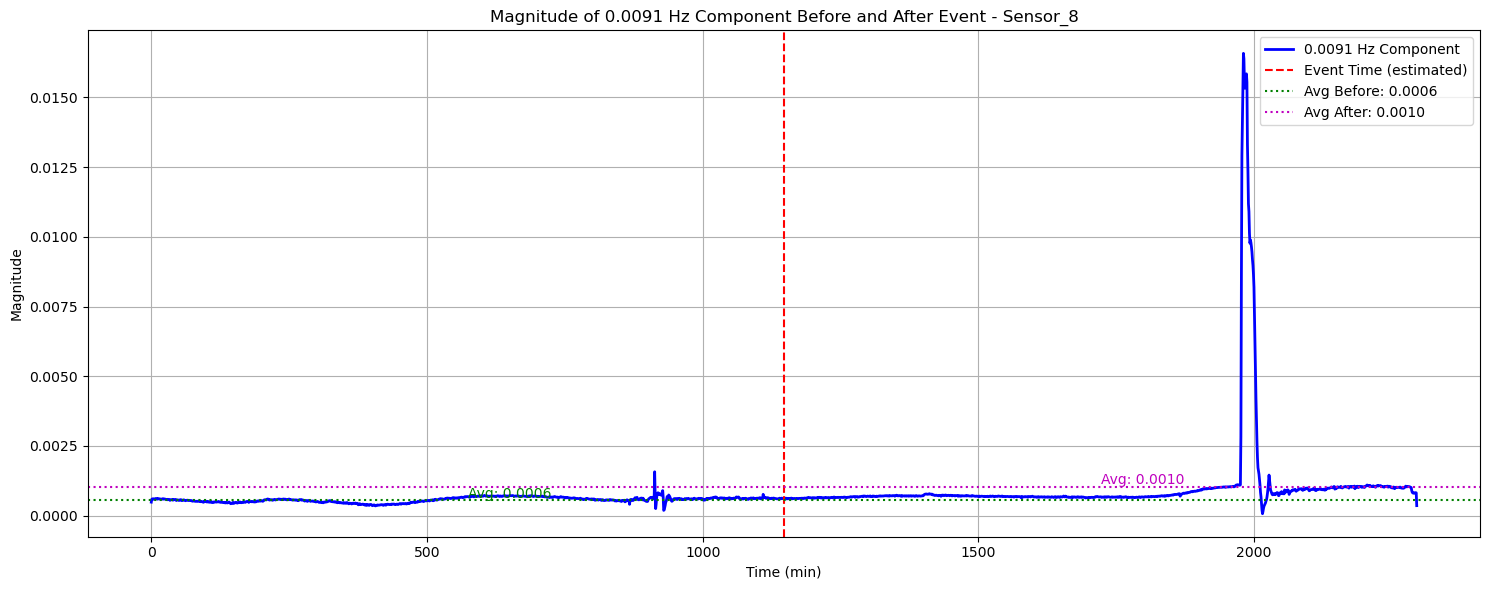


Energy Analysis:
Total energy before event: 0.0004
Total energy after event: 0.0051
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: 0.0000 (1101.13%)


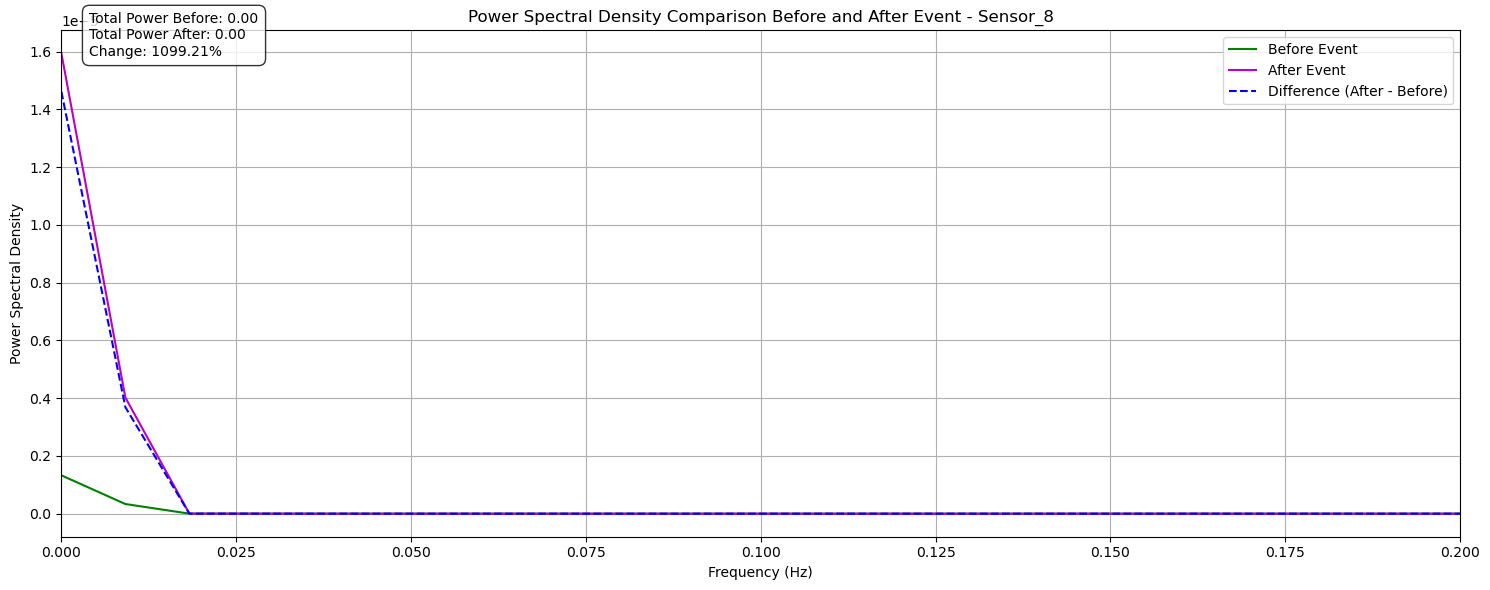


Power Spectral Density Analysis:
Total power before event: 0.0000
Total power after event: 0.0000
Absolute power change: 0.0000
Relative power change: 1099.21%
Saved significant changes data to: significant_changes_csv_overview\Sensor_8_significant_changes.csv

Top 5 frequencies with largest power increase:
    Frequency        Before         After  Absolute_Change  Percent_Change
1    0.009148  3.346394e-07  4.022346e-06     3.687706e-06     1101.664900
0    0.000000  1.327332e-06  1.594147e-05     1.461414e-05     1100.933448
2    0.018295  1.554422e-09  2.932299e-09     1.377877e-09       83.284524
17   0.155508  3.359294e-12  3.779891e-12     4.205974e-13        0.406928
52   0.475670  8.758653e-13  8.760369e-13     1.716905e-16        0.000170

Top 5 frequencies with largest power decrease:
   Frequency        Before         After  Absolute_Change  Percent_Change
3   0.027443  6.939021e-10  2.494227e-10    -4.444794e-10      -55.986674
4   0.036590  3.079535e-10  8.675781e-11    

In [11]:
# Analyze the target Hz frequency band before and after event for each sensor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

# Get dataset name from the notebook filename
notebook_name = os.path.basename(__file__) if '__file__' in globals() else 'overview'
if notebook_name.endswith('.ipynb'):
    notebook_name = notebook_name[:-6]  # Remove .ipynb extension
if notebook_name.startswith('da_'):
    notebook_name = notebook_name[3:]  # Remove da_ prefix

# Create a directory to save CSV files with dataset name
csv_dir = f"significant_changes_csv_{notebook_name}"
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
    print(f"Created directory: {csv_dir}")

# Calculate sampling frequency
sampling_freq = 1.0 / data['Timestamp'].diff().median()

# Find the event time (assuming it's at the center of the filtered data)
event_time = window_data['Timestamp'].mean()

# Loop through each voltage channel
for channel_to_analyze in voltage_columns:
    print(f"\n=== Analysis for {channel_to_analyze} ===")
    voltage_data = window_data[channel_to_analyze].values
    
    # Perform STFT for the selected channel
    f, t, Zxx = signal.stft(voltage_data, fs=sampling_freq, nperseg=256)
    
    # Find the closest frequency to traget_freq in the STFT results
    target_freq = 0.005
    freq_idx = np.argmin(np.abs(f - target_freq))
    actual_freq = f[freq_idx]
    print(f"Analyzing frequency: {actual_freq:.4f} Hz (closest to {target_freq} Hz)")
    
    # Extract the magnitude data for this frequency
    freq_magnitude = np.abs(Zxx[freq_idx, :])
    
    # Create a time axis in minutes for better visualization
    time_min = t / 60
    
    # Plot the magnitude of the 0.02Hz component over time
    plt.figure(figsize=(15, 6))
    
    # Plot the magnitude
    plt.plot(time_min, freq_magnitude, 'b-', linewidth=2, label=f'{actual_freq:.4f} Hz Component')
    
    # Convert event time to minutes
    event_time_min = t.mean() / 60
    plt.axvline(x=event_time_min, color='r', linestyle='--', label='Event Time (estimated)')
    
    # Calculate average magnitude before and after event
    before_mask = t < t.mean()
    after_mask = t >= t.mean()
    
    avg_before = np.mean(freq_magnitude[before_mask])
    avg_after = np.mean(freq_magnitude[after_mask])
    
    print(f"Average magnitude before event: {avg_before:.4f}")
    print(f"Average magnitude after event: {avg_after:.4f}")
    print(f"Change: {(avg_after - avg_before):.4f} ({(avg_after - avg_before)/avg_before*100:.2f}%)")
    
    # Add horizontal lines showing the average values
    plt.axhline(y=avg_before, color='g', linestyle=':', label=f'Avg Before: {avg_before:.4f}')
    plt.axhline(y=avg_after, color='m', linestyle=':', label=f'Avg After: {avg_after:.4f}')
    
    # Add annotations
    plt.annotate(f"Avg: {avg_before:.4f}", xy=(time_min[len(time_min)//4], avg_before), 
                 xytext=(time_min[len(time_min)//4], avg_before*1.1), color='g')
    plt.annotate(f"Avg: {avg_after:.4f}", xy=(time_min[3*len(time_min)//4], avg_after), 
                 xytext=(time_min[3*len(time_min)//4], avg_after*1.1), color='m')
    
    # Set axis labels and title
    plt.xlabel('Time (min)')
    plt.ylabel('Magnitude')
    plt.title(f'Magnitude of {actual_freq:.4f} Hz Component Before and After Event - {channel_to_analyze}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Calculate energy (integral of magnitude squared) before and after event
    energy_before = np.sum(freq_magnitude[before_mask]**2)
    energy_after = np.sum(freq_magnitude[after_mask]**2)
    
    # Normalize by the number of samples to get average energy
    num_samples_before = np.sum(before_mask)
    num_samples_after = np.sum(after_mask)
    avg_energy_before = energy_before / num_samples_before
    avg_energy_after = energy_after / num_samples_after
    
    print("\nEnergy Analysis:")
    print(f"Total energy before event: {energy_before:.4f}")
    print(f"Total energy after event: {energy_after:.4f}")
    print(f"Average energy before event: {avg_energy_before:.4f}")
    print(f"Average energy after event: {avg_energy_after:.4f}")
    print(f"Energy change: {(avg_energy_after - avg_energy_before):.4f} ({(avg_energy_after - avg_energy_before)/avg_energy_before*100:.2f}%)")
    
    # Power Spectral Density (PSD) Analysis
    # Calculate power (magnitude squared)
    power_matrix = np.abs(Zxx) ** 2
    
    # Convert time to minutes for consistency with previous plots
    time_min = t / 60
    
    # Define the event time point (assuming same as before)
    event_time_min = time_min[len(time_min) // 2]  # Middle point as event time
    
    # Create masks for before and after event
    before_mask_time = time_min < event_time_min
    after_mask_time = time_min > event_time_min
    
    # Calculate average PSD before and after event
    avg_psd_before = np.mean(power_matrix[:, before_mask_time], axis=1)
    avg_psd_after = np.mean(power_matrix[:, after_mask_time], axis=1)
    
    # Plot the power spectral density comparison
    plt.figure(figsize=(15, 6))
    plt.plot(f, avg_psd_before, 'g-', label='Before Event')
    plt.plot(f, avg_psd_after, 'm-', label='After Event')
    
    # Calculate and display the difference
    psd_diff = avg_psd_after - avg_psd_before
    plt.plot(f, psd_diff, 'b--', label='Difference (After - Before)')
    
    # Set axis labels and title
    plt.xlabel('Frequency (Hz)')
    plt.xlim(0, 0.2)  # Limit x-axis to show only frequencies below 0.2 Hz
    plt.ylabel('Power Spectral Density')
    plt.title(f'Power Spectral Density Comparison Before and After Event - {channel_to_analyze}')
    plt.grid(True)
    plt.legend()
    
    # Add text box with summary statistics
    total_power_before = np.sum(avg_psd_before)
    total_power_after = np.sum(avg_psd_after)
    power_change = (total_power_after - total_power_before) / total_power_before * 100
    
    stats_text = f"Total Power Before: {total_power_before:.2f}\n"
    stats_text += f"Total Power After: {total_power_after:.2f}\n"
    stats_text += f"Change: {power_change:.2f}%"
    
    plt.annotate(stats_text, xy=(0.02, 0.95), xycoords='axes fraction',
                 bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nPower Spectral Density Analysis:")
    print(f"Total power before event: {total_power_before:.4f}")
    print(f"Total power after event: {total_power_after:.4f}")
    print(f"Absolute power change: {total_power_after - total_power_before:.4f}")
    print(f"Relative power change: {power_change:.2f}%")
    
    # Find frequency bands with the most significant changes
    freq_change_percent = (avg_psd_after - avg_psd_before) / (avg_psd_before + 1e-10) * 100  # Avoid division by zero
    significant_changes = pd.DataFrame({
        'Frequency': f,
        'Before': avg_psd_before,
        'After': avg_psd_after,
        'Absolute_Change': avg_psd_after - avg_psd_before,
        'Percent_Change': freq_change_percent
    })
    
    # Save the significant_changes DataFrame to CSV
    csv_filename = os.path.join(csv_dir, f"{channel_to_analyze}_significant_changes.csv")
    significant_changes.to_csv(csv_filename, index=False)
    print(f"Saved significant changes data to: {csv_filename}")
    
    # Display top 5 frequencies with largest increase and decrease
    print("\nTop 5 frequencies with largest power increase:")
    print(significant_changes.sort_values('Percent_Change', ascending=False).head(5))
    
    print("\nTop 5 frequencies with largest power decrease:")
    print(significant_changes.sort_values('Percent_Change', ascending=True).head(5))



Analyzing significant changes across all sensors...


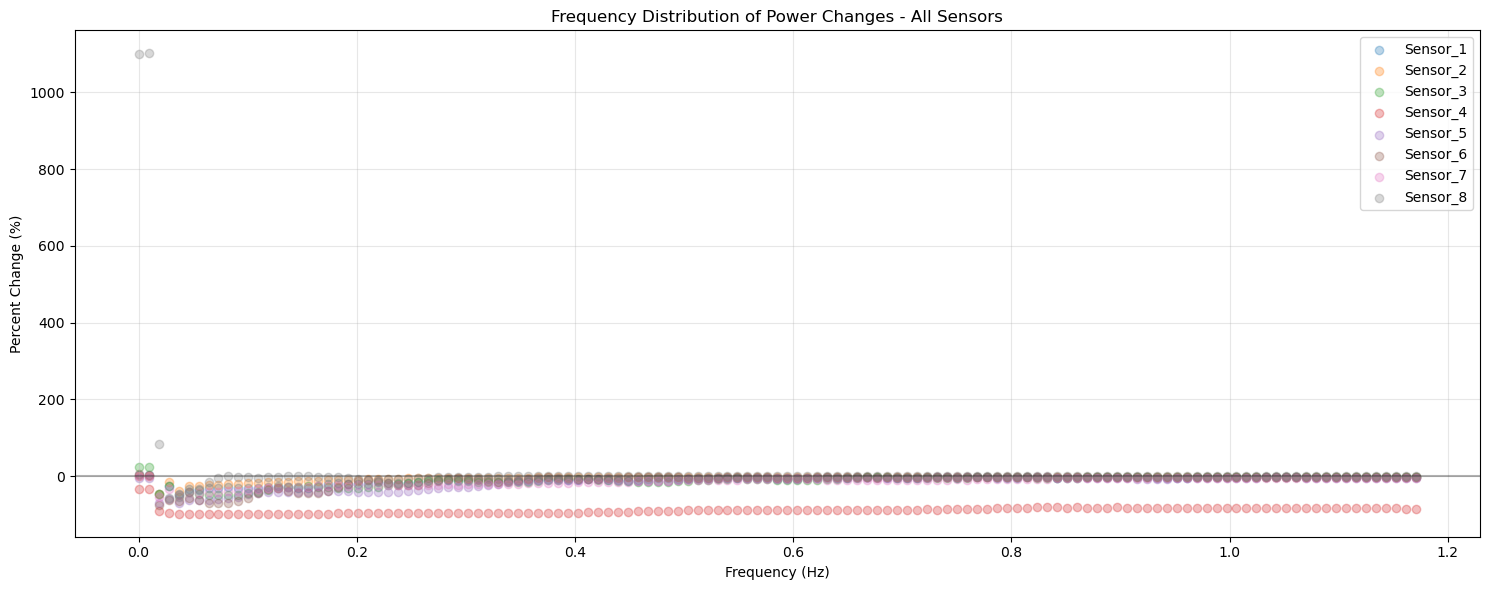


Analyzing patterns in top increases and decreases...


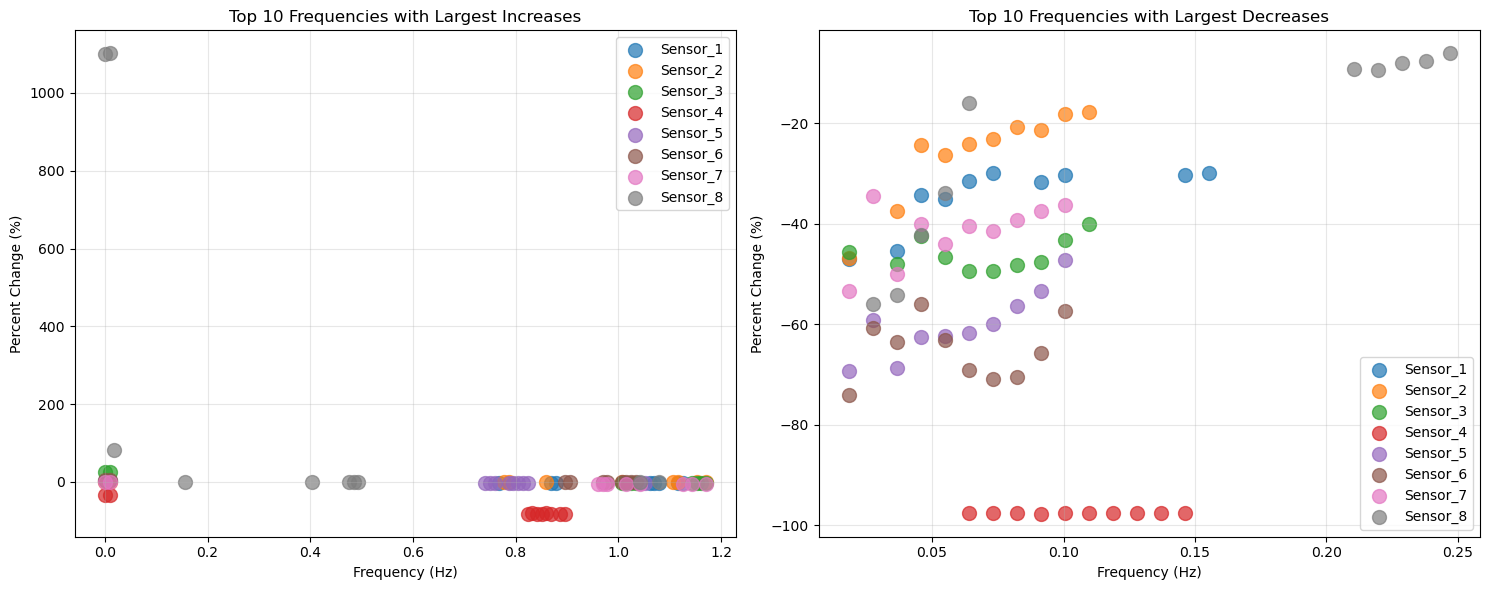


Analyzing frequency overlap between sensors...
Common frequencies showing increases across all sensors: []
Common frequencies showing decreases across all sensors: [0.0365900208171327, 0.0457375260214159, 0.0548850312256991, 0.0640325364299822, 0.0731800416342654, 0.100622557247115, 0.1097700624513982, 0.1189175676556814]


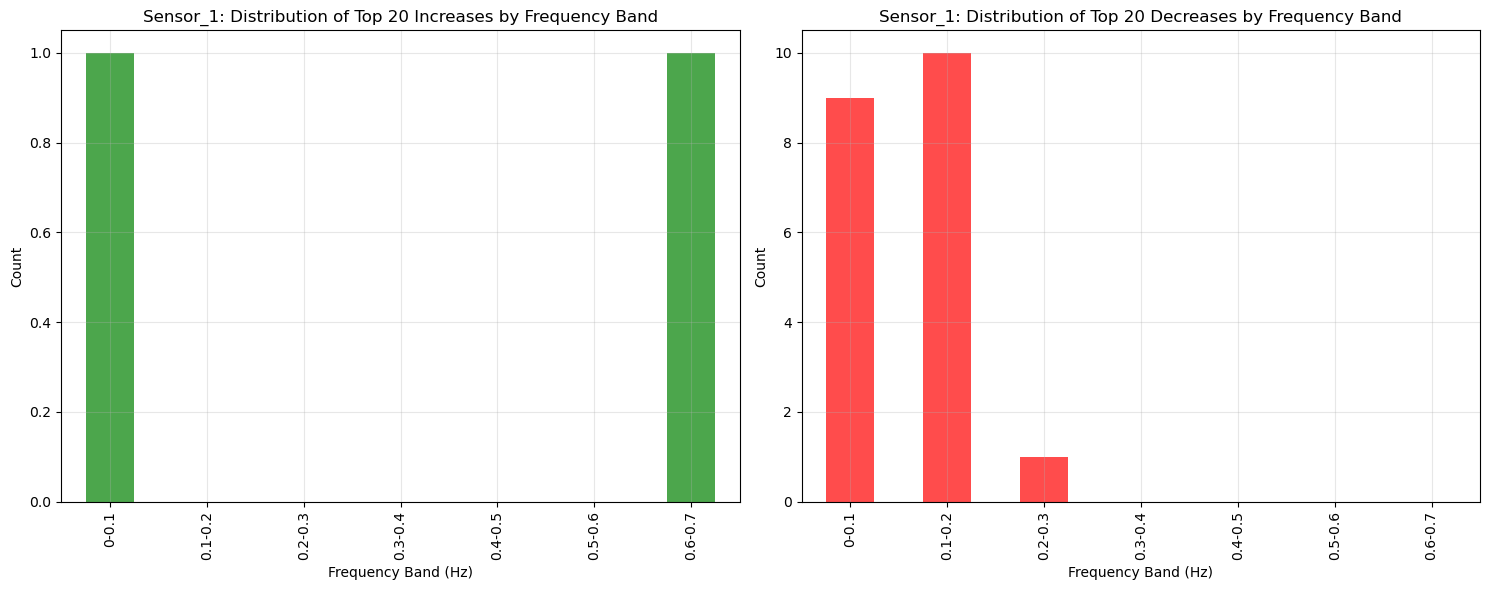

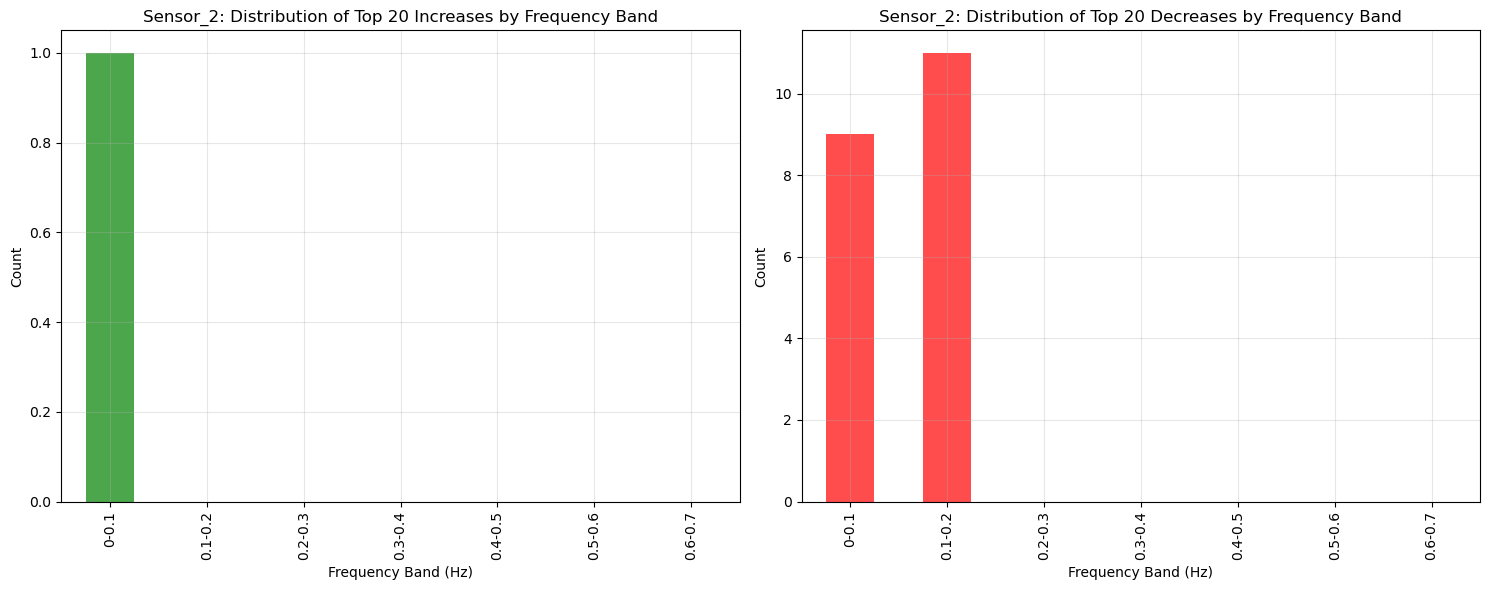

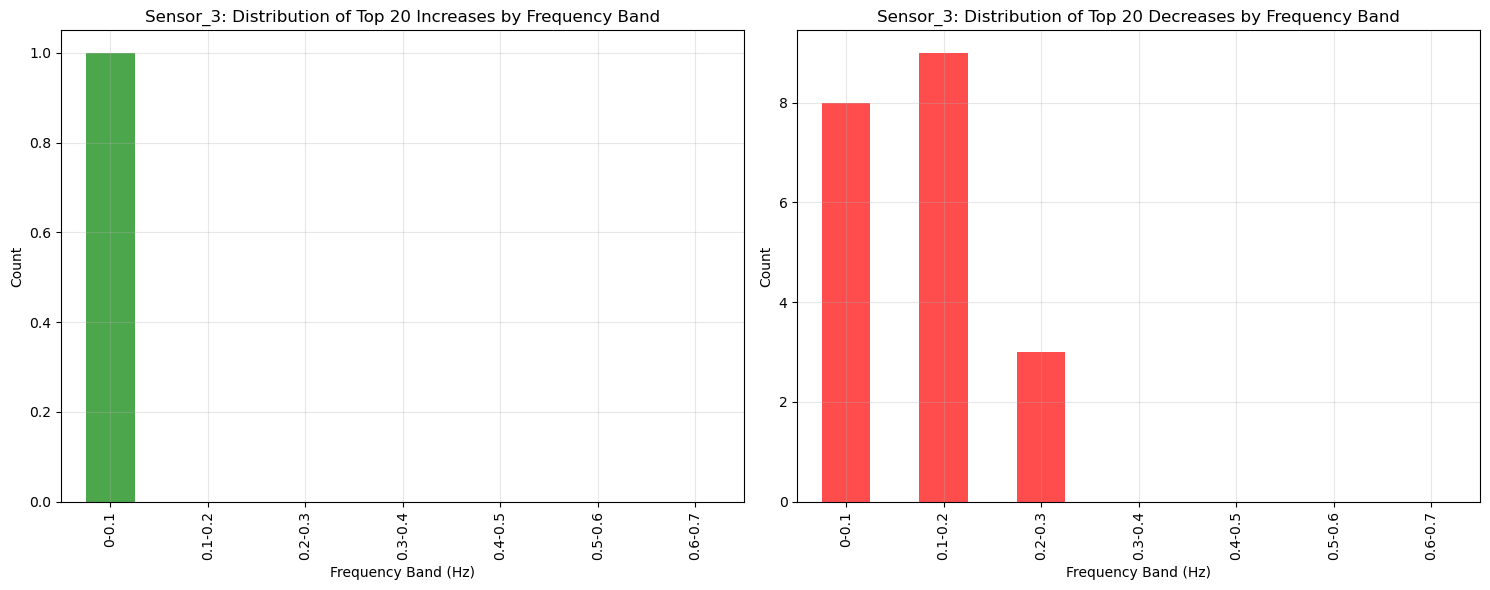

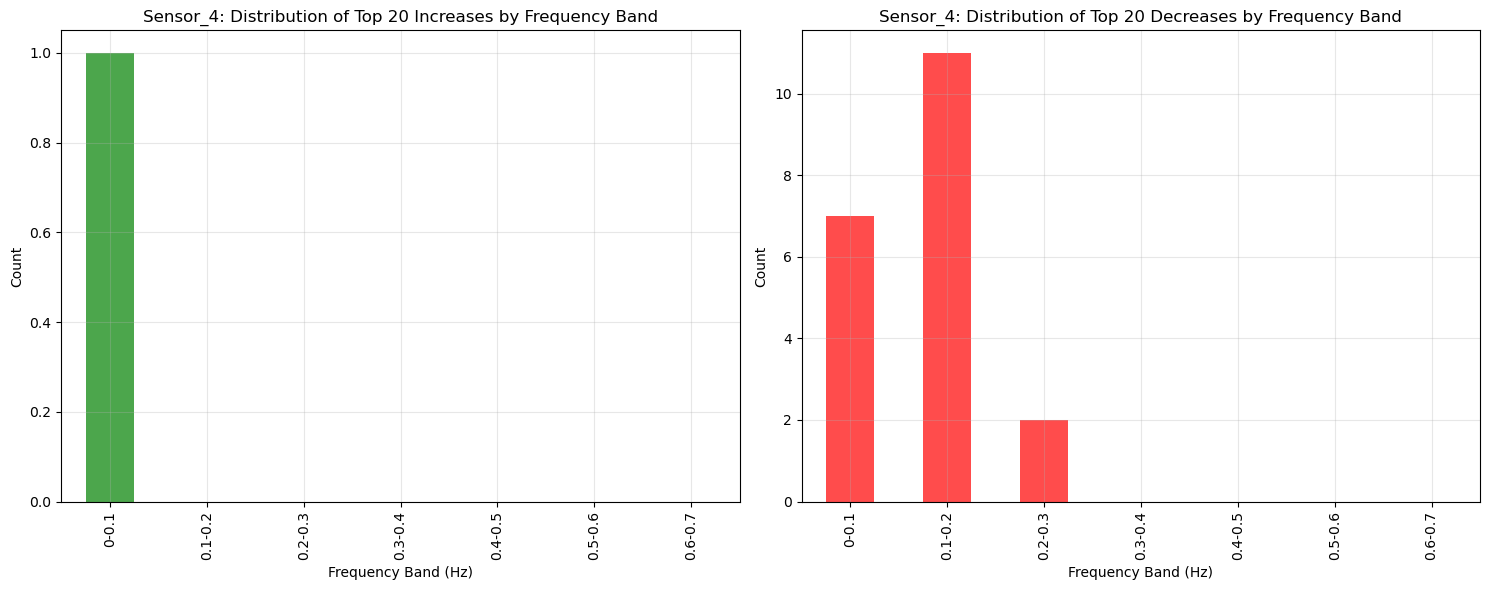

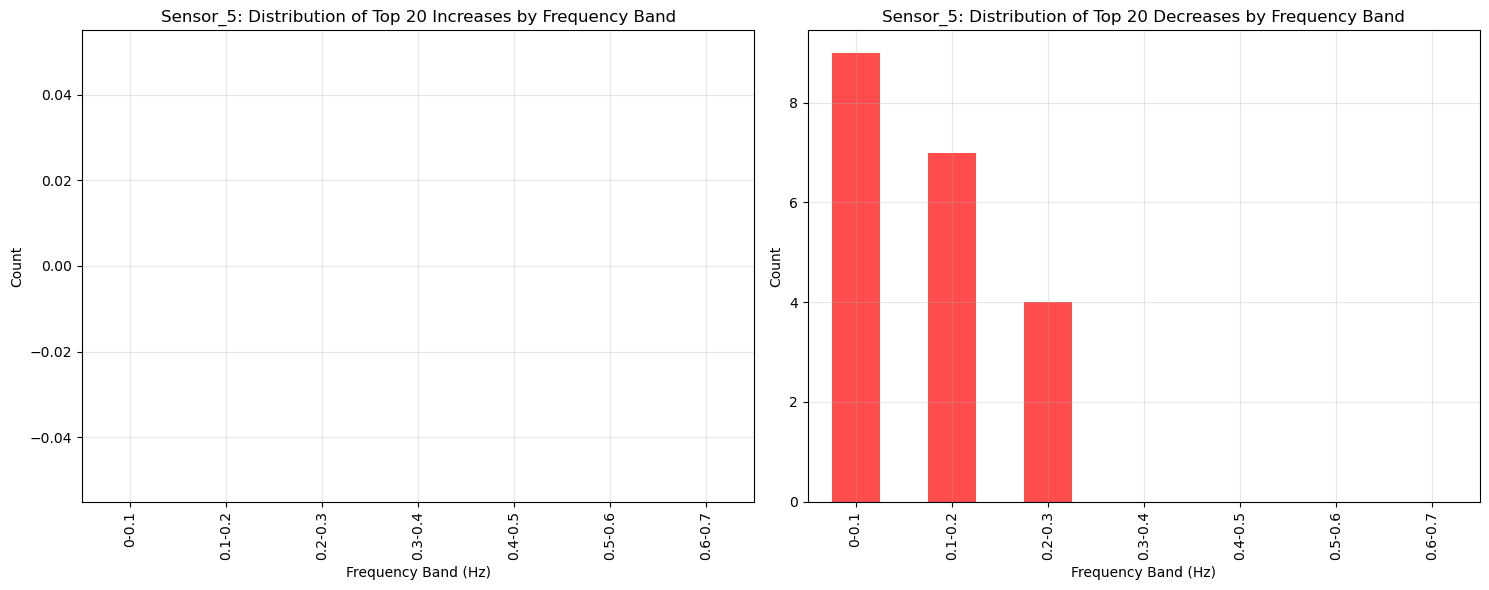

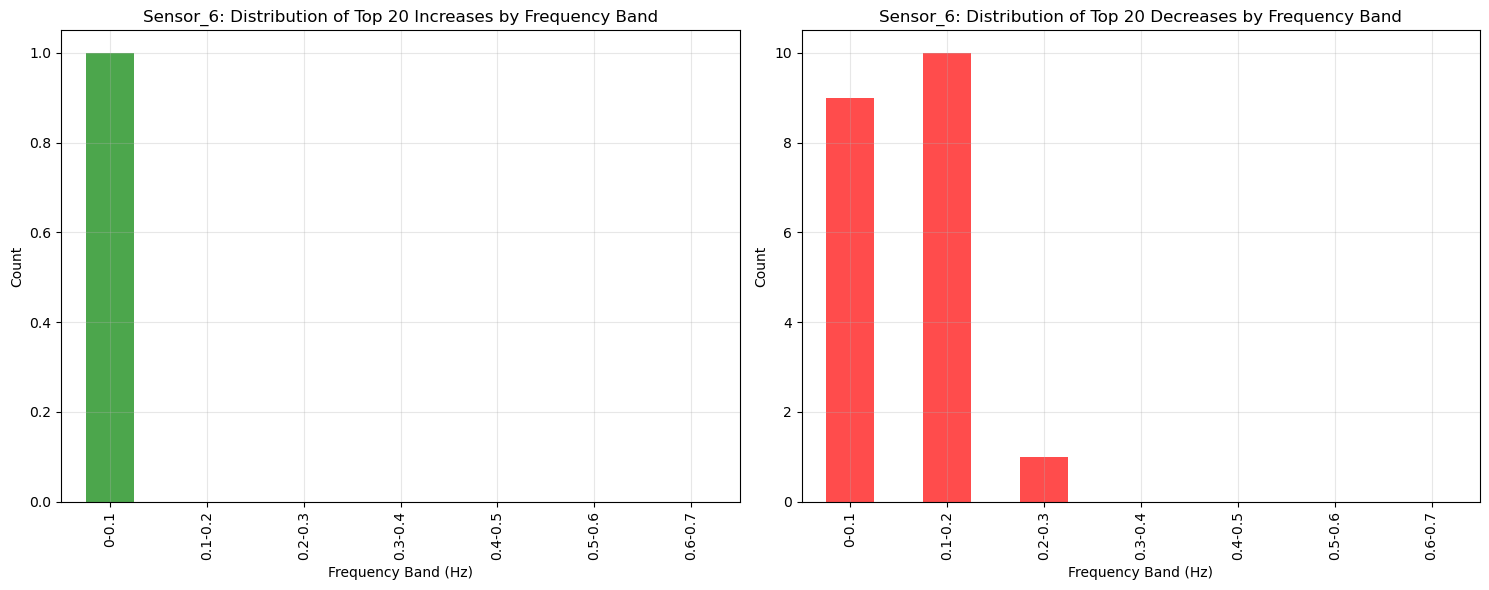

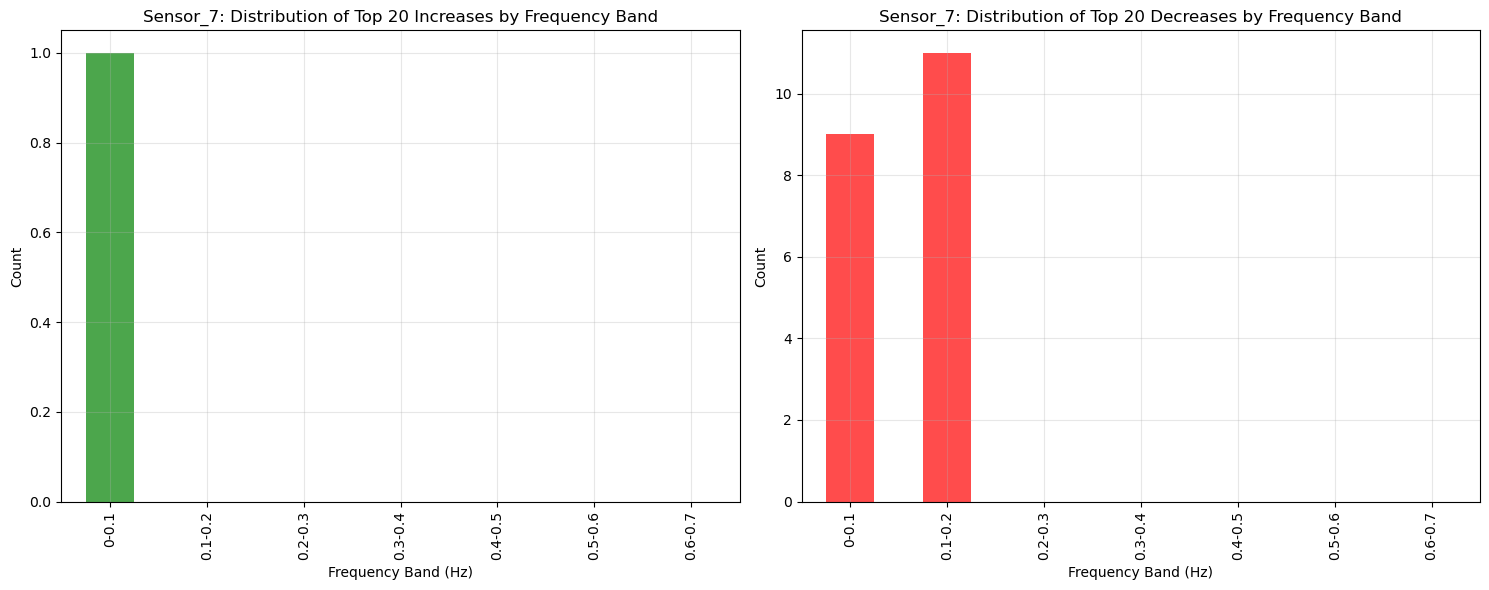

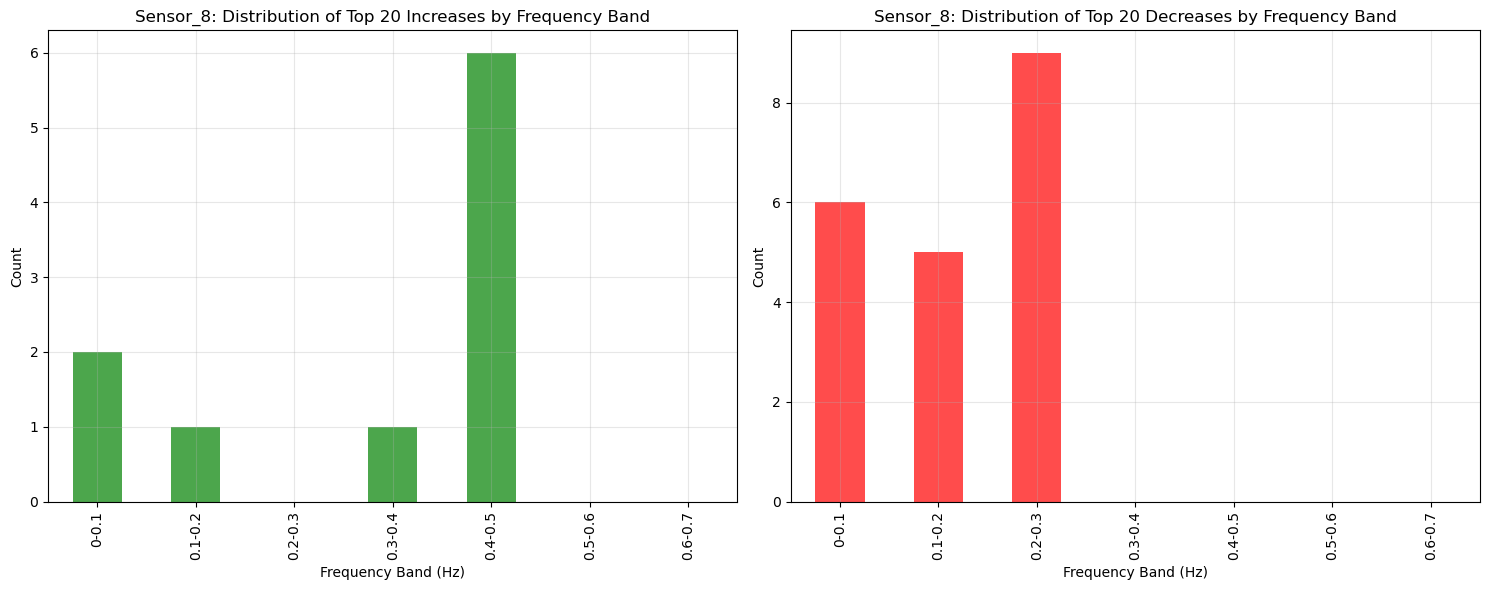

In [12]:
import seaborn as sns

# Analyze significant changes across all sensors
print("\nAnalyzing significant changes across all sensors...")

# Define the directory containing the CSV files
csv_dir_path = f"significant_changes_csv_{notebook_name}"

# Get all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir_path) if f.endswith('_significant_changes.csv')]

# Initialize lists to store summary data
sensor_names = []
top_increase_freqs = []
top_decrease_freqs = []
all_sensor_data = {}

# Create a figure for comparing all sensors
plt.figure(figsize=(15, 6))

# Process each sensor's data
for csv_file in csv_files:
    # Extract sensor name from filename
    sensor_name = csv_file.split('_significant_changes.csv')[0]
    sensor_names.append(sensor_name)
    
    # Load the CSV data
    csv_path = os.path.join(csv_dir_path, csv_file)
    sensor_data = pd.read_csv(csv_path)
    all_sensor_data[sensor_name] = sensor_data
    
    # Sort by absolute percent change
    sensor_data['Abs_Percent_Change'] = np.abs(sensor_data['Percent_Change'])
    
    # Get top increases and decreases
    top_increases = sensor_data.sort_values('Percent_Change', ascending=False).head(20)
    top_increase_freqs.append(top_increases['Frequency'].tolist())
    
    top_decreases = sensor_data.sort_values('Percent_Change', ascending=True).head(20)
    top_decrease_freqs.append(top_decreases['Frequency'].tolist())
    
    # Plot frequency vs percent change for this sensor
    plt.scatter(sensor_data['Frequency'], sensor_data['Percent_Change'], 
                alpha=0.3, label=sensor_name)

# Add plot details
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percent Change (%)')
plt.title('Frequency Distribution of Power Changes - All Sensors')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze patterns in top increases and decreases
print("\nAnalyzing patterns in top increases and decreases...")

# Create figures for top increases and decreases
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
for i, sensor_name in enumerate(sensor_names):
    sensor_data = all_sensor_data[sensor_name]
    top_increases = sensor_data.sort_values('Percent_Change', ascending=False).head(10)
    plt.scatter(top_increases['Frequency'], top_increases['Percent_Change'], 
                label=sensor_name, s=100, alpha=0.7)
    
    # Removed annotation of frequencies to avoid overlapping text

plt.title('Top 10 Frequencies with Largest Increases')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for i, sensor_name in enumerate(sensor_names):
    sensor_data = all_sensor_data[sensor_name]
    top_decreases = sensor_data.sort_values('Percent_Change', ascending=True).head(10)
    plt.scatter(top_decreases['Frequency'], top_decreases['Percent_Change'], 
                label=sensor_name, s=100, alpha=0.7)
    
    # Removed annotation of frequencies to avoid overlapping text

plt.title('Top 10 Frequencies with Largest Decreases')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze frequency overlap between sensors for top increases and decreases
print("\nAnalyzing frequency overlap between sensors...")

# For increases
increase_overlap = set(top_increase_freqs[0])
for freqs in top_increase_freqs[1:]:
    increase_overlap = increase_overlap.intersection(set(freqs))

# For decreases
decrease_overlap = set(top_decrease_freqs[0])
for freqs in top_decrease_freqs[1:]:
    decrease_overlap = decrease_overlap.intersection(set(freqs))

print(f"Common frequencies showing increases across all sensors: {sorted(list(increase_overlap))}")
print(f"Common frequencies showing decreases across all sensors: {sorted(list(decrease_overlap))}")

# Analyze the distribution of top changes by frequency range
for sensor_name in sensor_names:
    sensor_data = all_sensor_data[sensor_name]
    
    # Define frequency bands
    sensor_data['Frequency_Band'] = pd.cut(sensor_data['Frequency'], 
                                          bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                                          labels=['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7'])
    
    # Count top increases and decreases by frequency band
    top_increases = sensor_data.sort_values('Percent_Change', ascending=False).head(20)
    top_decreases = sensor_data.sort_values('Percent_Change', ascending=True).head(20)
    
    increase_band_counts = top_increases['Frequency_Band'].value_counts().sort_index()
    decrease_band_counts = top_decreases['Frequency_Band'].value_counts().sort_index()
    
    # Plot distribution of top changes by frequency band
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    increase_band_counts.plot(kind='bar', color='green', alpha=0.7)
    plt.title(f'{sensor_name}: Distribution of Top 20 Increases by Frequency Band')
    plt.xlabel('Frequency Band (Hz)')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    decrease_band_counts.plot(kind='bar', color='red', alpha=0.7)
    plt.title(f'{sensor_name}: Distribution of Top 20 Decreases by Frequency Band')
    plt.xlabel('Frequency Band (Hz)')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
